#Primer Proyecto de Aplicaciones Computacionales
##Grupo 3
###Nombres:

*   Damian Ospina - 2201296
*   Jeicor Florez - 2231328
*   Daniel Morales - 2200812
*   David Pinzón - 2221623





En este proyecto se ponen en practica diferentes métodos de interpolación de datos para una ecuación de estado, analizando primero la dependencia de la presión (P) respecto a la densidad de masa (rho) y la densidad de masa Bariónica (n_B). Estas cantidades se utilizaron con las unidades:



*   P: presión en dyn/cm^2 (den/centímetros cuadrados)
*   rho: densidad de masa en g/cm^3 (gramo / centímetros cúbicos)
*   n_B: densidad bariónica fm^{-3} (fentómetros cúbicos inversos)



Esquema de Colores para el team:

*   Interpolación de Lagrange: color='blue'
*   Interpolación de SC natural: color='green'
*   Interpolación de SC not-a-knot: color='red'
*   Interpolación de PCHIP: color='purple'



##Importamos las Librerias

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import lagrange, CubicSpline, PchipInterpolator

In [76]:
!wget 'https://drive.google.com/uc?export=download&id=1EvyNP77bIhjHHGFOSaY0FDbG2l4JYvlH' -O 'sly4.dat'

--2025-09-17 22:51:52--  https://drive.google.com/uc?export=download&id=1EvyNP77bIhjHHGFOSaY0FDbG2l4JYvlH
Resolving drive.google.com (drive.google.com)... 74.125.26.101, 74.125.26.138, 74.125.26.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.26.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1EvyNP77bIhjHHGFOSaY0FDbG2l4JYvlH&export=download [following]
--2025-09-17 22:51:52--  https://drive.usercontent.google.com/download?id=1EvyNP77bIhjHHGFOSaY0FDbG2l4JYvlH&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.107.132, 2607:f8b0:400c:c32::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.107.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6040 (5.9K) [application/octet-stream]
Saving to: ‘sly4.dat’

sly4.dat            100%[===================>]   5.90K  --.-KB/s    in 0s  

#Análisis del Conjunto de Datos


In [77]:
datos = "sly4.dat"
cols = ['index', 'n_B[fm^{-3}]', 'rho[g/cm^3]','P[dyn/cm^2]'] # nombres de las columnas
dataframe = pd.read_csv(datos, sep='\\s+', skiprows=6, names=cols, usecols=[1,2,3])
dataframe.head(10)

,n_B[fm^{-3}],rho[g/cm^3],P[dyn/cm^2]
0,2.720000e-14,45.1,1.700000e+14
1,1.270000e-13,212.0,5.820000e+15
2,6.930000e-13,1150.0,1.900000e+17
3,6.295000e-12,10440.0,9.744000e+18
4,1.581000e-11,26220.0,4.968000e+19
5,3.972000e-11,65870.0,2.431000e+20
6,9.976000e-11,165400.0,1.151000e+21
7,2.506000e-10,415600.0,5.266000e+21
8,6.294000e-10,1044000.0,2.318000e+22
9,1.581000e-09,2622000.0,9.755000e+22


In [78]:
print("Número de filas:", len(dataframe))

Número de filas: 152


¿Cuáles son los datos mínimos y máximos de las variables de nuestra base de datos?

Estos datos nos dará información sobre el rango de cada una de ellas.

In [79]:
print(f"El mínimo de rho es: {dataframe['rho[g/cm^3]'].min():.2e}")
print(f"El máximo de rho es: {dataframe['rho[g/cm^3]'].max():.2e}")

print(f"\nEl mínimo de n_B es: {dataframe['n_B[fm^{-3}]'].min():.2e}")
print(f"El máximo de n_B es: {dataframe['n_B[fm^{-3}]'].max():.2e}")

print(f"\nEl mínimo de P es: {dataframe['P[dyn/cm^2]'].min():.2e}")
print(f"El máximo de P es: {dataframe['P[dyn/cm^2]'].max():.2e}")

El mínimo de rho es: 4.51e+01
El máximo de rho es: 6.75e+15

El mínimo de n_B es: 2.72e-14
El máximo de n_B es: 2.00e+00

El mínimo de P es: 1.70e+14
El máximo de P es: 5.34e+36


Ahora comprobamos si los datos son de paso constante, si afirmativamente lo son, la diferencia entre cada par da datos será aproximadamente la misma.

No espero obtener una respuesta afirmativa porque los datos cambian en ordenes de magnitud, una locura.

In [80]:
delta_nB = np.diff(dataframe["n_B[fm^{-3}]"])
delta_rho = np.diff(dataframe["rho[g/cm^3]"])
delta_P   = np.diff(dataframe["P[dyn/cm^2]"])

print("¿Paso constante en n_B?", np.allclose(delta_nB, delta_nB[0]))
print("¿Paso constante en rho?", np.allclose(delta_rho, delta_rho[0]))
print("¿Paso constante en P?", np.allclose(delta_P, delta_P[0]))

¿Paso constante en n_B? False
¿Paso constante en rho? False
¿Paso constante en P? False


In [81]:
#Se realizó una depuración de los datos pero quedó igual xD

dataframe = dataframe.replace([np.inf, -np.inf], np.nan).dropna() #Elimina los infinitos
dataframe = dataframe[dataframe["rho[g/cm^3]"] > 0] #Eliminamos valores de datos pequeños
dataframe = dataframe[dataframe["P[dyn/cm^2]"] > 0]
print("Filas válidas tras limpieza:", len(dataframe))
print(dataframe.iloc[:5].to_string(index=False))
len(dataframe)

Filas válidas tras limpieza: 152
 n_B[fm^{-3}]  rho[g/cm^3]  P[dyn/cm^2]
 2.720000e-14         45.1 1.700000e+14
 1.270000e-13        212.0 5.820000e+15
 6.930000e-13       1150.0 1.900000e+17
 6.295000e-12      10440.0 9.744000e+18
 1.581000e-11      26220.0 4.968000e+19


152

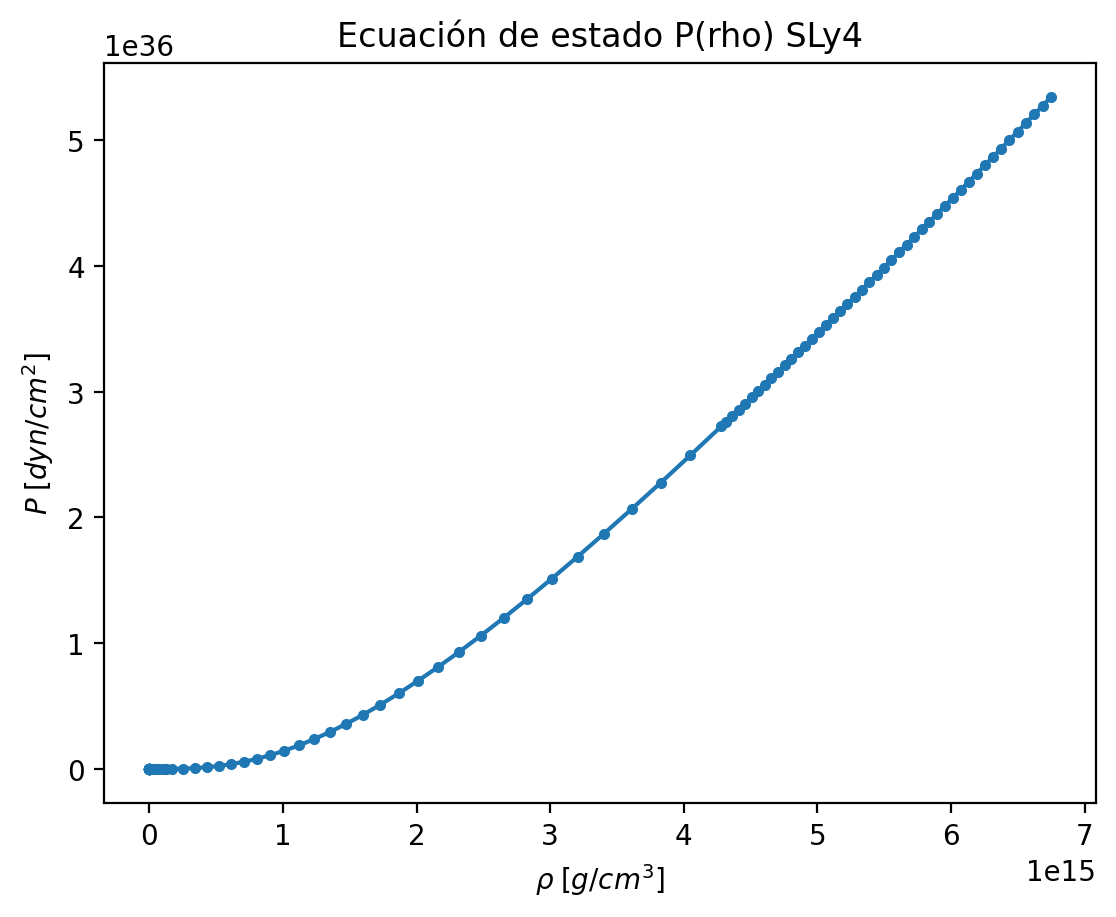

In [82]:
#Gráfica de las columnas rho vs P

plt.plot(dataframe["rho[g/cm^3]"], dataframe["P[dyn/cm^2]"], marker='.')
plt.xscale("linear")
plt.yscale("linear")
plt.xlabel(r"$\rho\;[g/cm^3]$")
plt.ylabel(r"$P\;[dyn/cm^2]$")
plt.title("Ecuación de estado P(rho) SLy4")
plt.show()

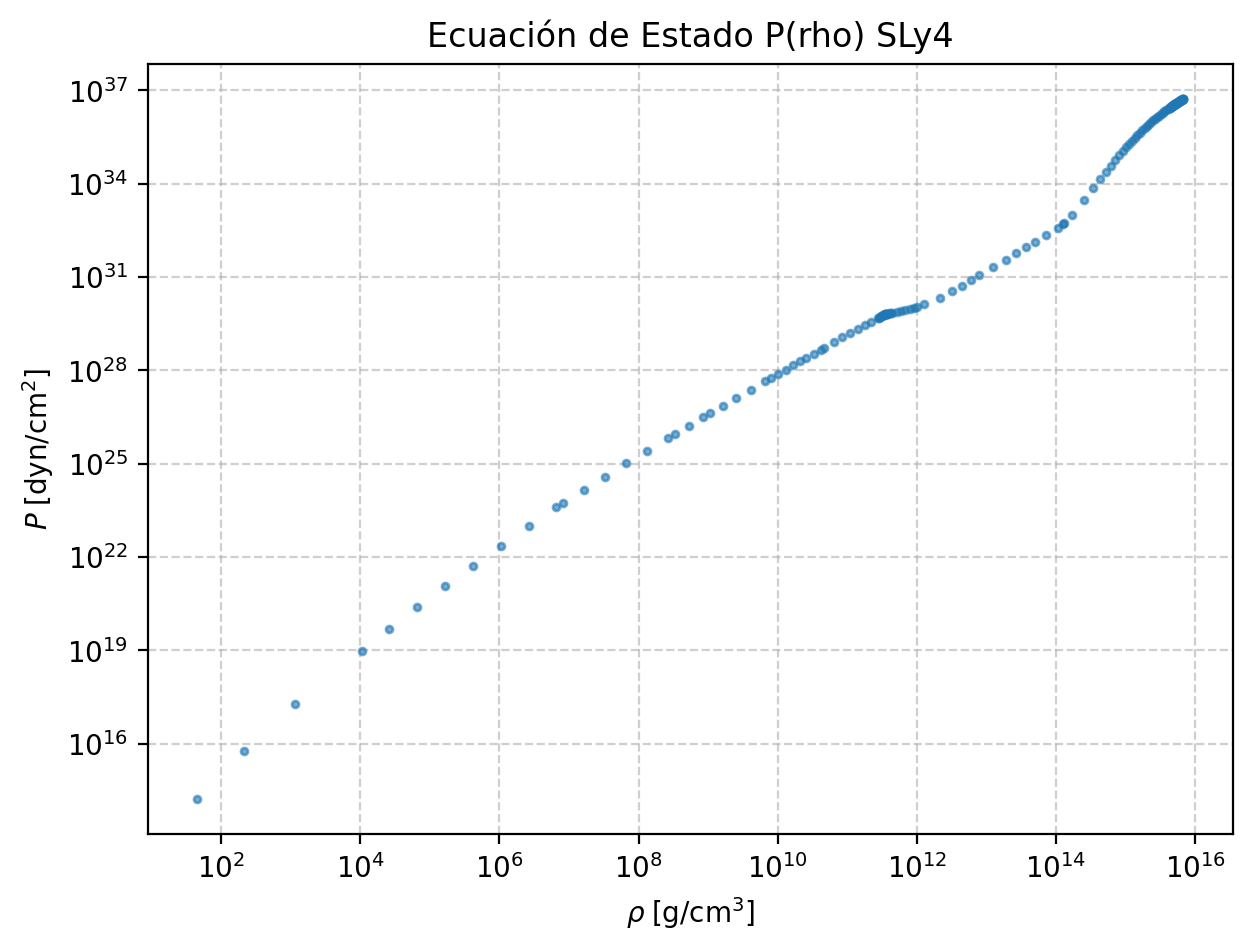

In [83]:
plt.figure(figsize=(7,5))
plt.loglog(dataframe["rho[g/cm^3]"], dataframe["P[dyn/cm^2]"], marker='.', linestyle='none', markersize=5, alpha=0.6)
plt.xlabel(r'$\rho \; [\mathrm{g/cm^3}]$')
plt.ylabel(r'$P \; [\mathrm{dyn/cm^2}]$')
plt.xscale('log')
plt.yscale('log')
plt.title("Ecuación de Estado P(rho) SLy4")
plt.grid(True, which='both', ls='--', alpha=0.6)
plt.show()

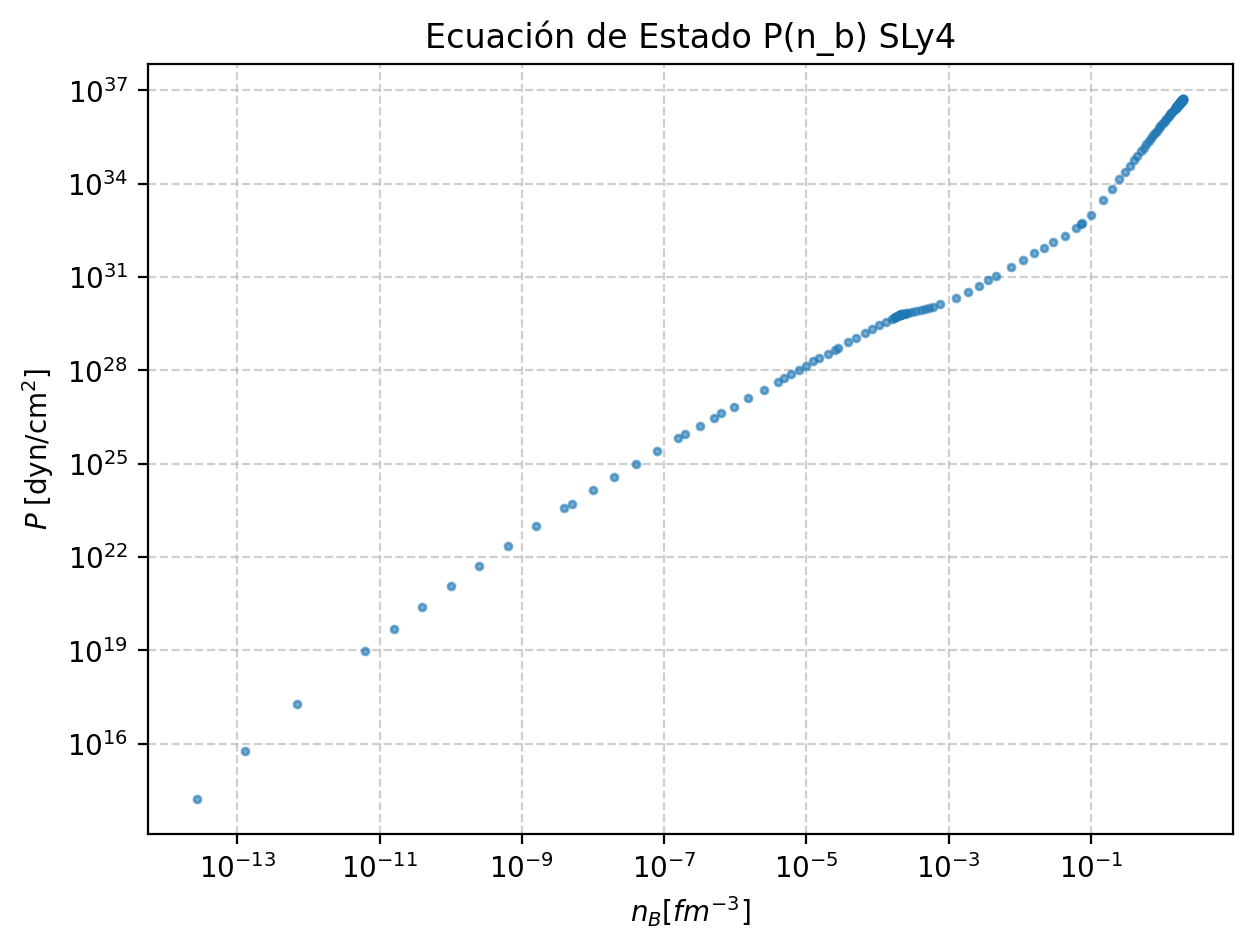

In [84]:
plt.figure(figsize=(7,5))
plt.loglog(dataframe["n_B[fm^{-3}]"], dataframe["P[dyn/cm^2]"], marker='.', linestyle='none', markersize=5, alpha=0.6)
plt.xlabel(r'$n_B[fm^{-3}]$')
plt.ylabel(r'$P \; [\mathrm{dyn/cm^2}]$')
plt.xscale('log')
plt.yscale('log')
plt.title("Ecuación de Estado P(n_b) SLy4")
plt.grid(True, which='both', ls='--', alpha=0.6)
plt.show()

In [85]:
#No sé que hace
%config InlineBackend.figure_format = 'retina'

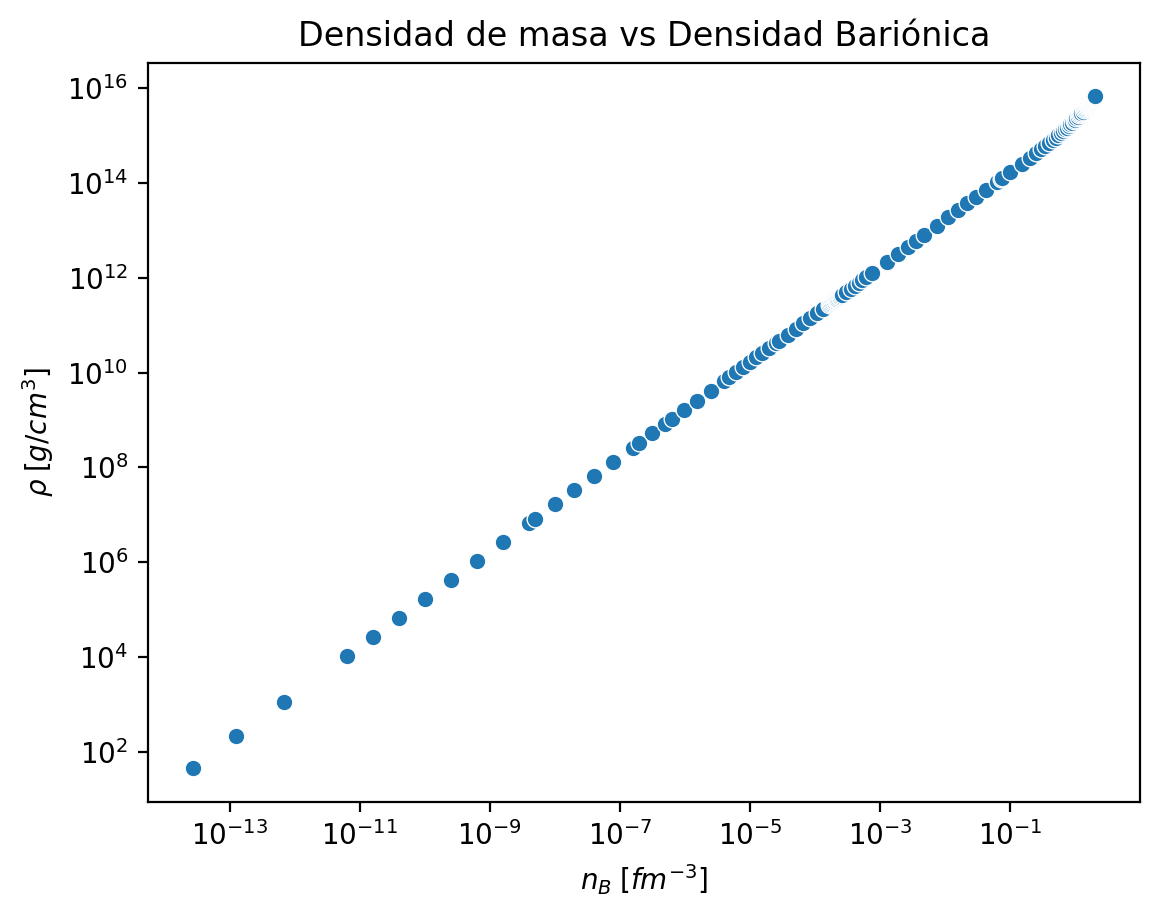

In [86]:
#A esto le podemos hacer una aproximación lineal para justificar el
#porqué las gráficas son tan parecidas

g = sns.scatterplot(data=dataframe, x='n_B[fm^{-3}]', y='rho[g/cm^3]')
g.set_xlabel(r'$n_B \; [fm^{-3}]$')
g.set_ylabel(r'$\rho  \; [g/cm^3]$')
g.set_title("Densidad de masa vs Densidad Bariónica")
g.set_xscale('log')
g.set_yscale('log')

Ajuste (en log-log): pendiente = 1.02481, intersección = 15.38128
Ajuste (en lineal): alpha = 2.40593e+15, n = 1.02481 




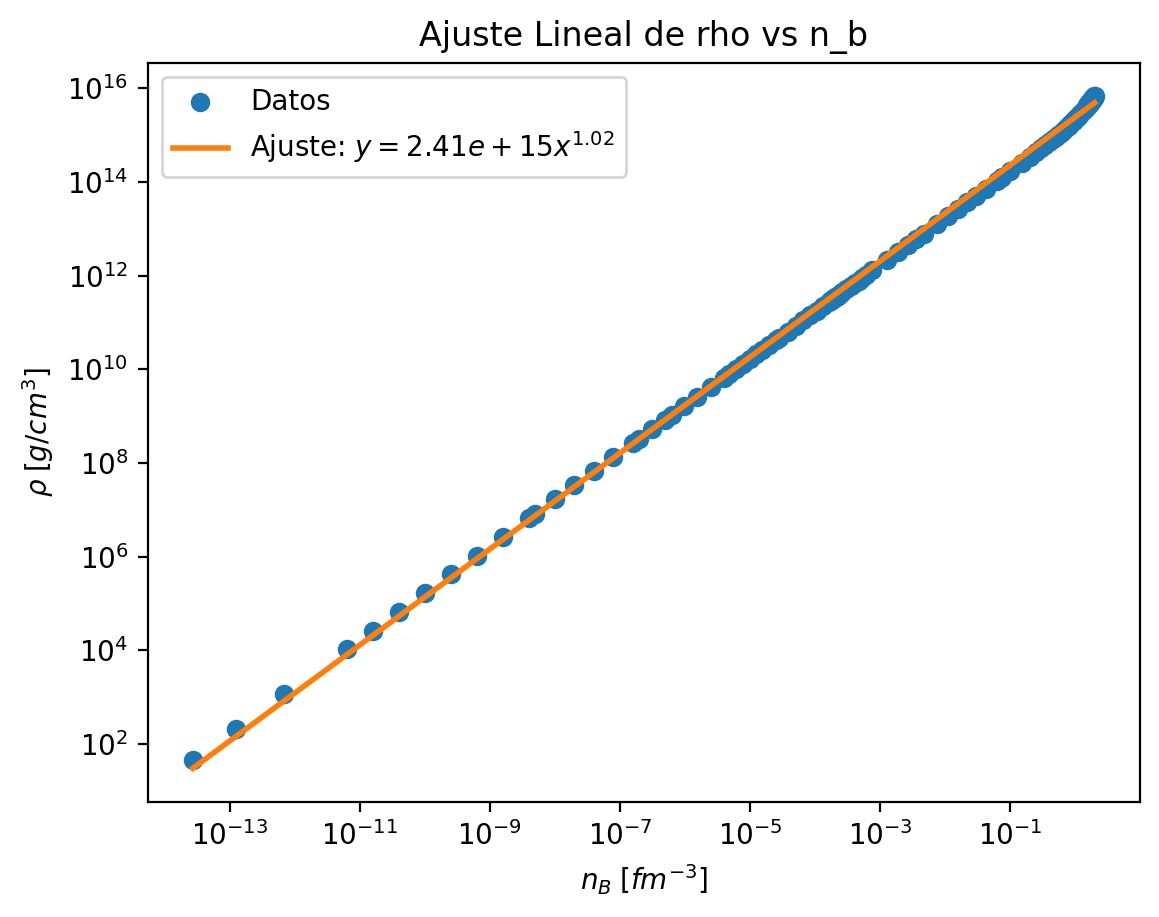

In [87]:
x = dataframe['n_B[fm^{-3}]']
y = dataframe['rho[g/cm^3]']

x_log = np.log10(x)
y_log = np.log10(y)

#ajuste lineal (y = mx + c)
m, c = np.polyfit(x_log, y_log, 1)

alpha_fit = 10**c
n_fit = m

print(f"Ajuste (en log-log): pendiente = {m:.5f}, intersección = {c:.5f}")
print(f"Ajuste (en lineal): alpha = {alpha_fit:.5e}, n = {n_fit:.5f} \n\n")

fig, ax = plt.subplots()


ax.scatter(x, y, label='Datos')

# ajuste lineal y = \alpha * x ** n
x_fit = np.linspace(min(x), max(x), 100)
y_fit = alpha_fit * (x_fit ** n_fit)
ax.plot(x_fit, y_fit, label=r'Ajuste: $y = {0:.2e}x^{{{1:.2f}}}$'.format(alpha_fit,n_fit), color='C1', linewidth=2)


ax.set_xlabel(r'$n_B \; [fm^{-3}]$')
ax.set_ylabel(r'$\rho \; [g/cm^3]$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title("Ajuste Lineal de rho vs n_b")
ax.legend()
plt.show()

#Método Lagrange









*   Tenemos que hallar un error relativo, valor verdadero - el valor del ajuste sobre el valor verdadero,
Hay valor absoluto y valor relativo. ()


*   ¿Están los datos igualmente espaciados? (X)
*   ¿Cuál es la variable independiente y cual es variable dependiente? (X)



In [88]:
dataframe.describe()
#El 75% de los datos están en agrupados

,n_B[fm^{-3}],rho[g/cm^3],P[dyn/cm^2]
count,1.520000e+02,1.520000e+02,1.520000e+02
mean,6.912947e-01,1.992758e+15,1.332255e+36
std,7.984834e-01,2.463589e+15,1.829668e+36
min,2.720000e-14,4.510000e+01,1.700000e+14
25%,1.007325e-04,1.682500e+11,2.619750e+29
50%,7.456500e-02,1.260500e+14,5.208500e+32
75%,1.619500e+00,4.617500e+15,3.066750e+36
max,1.997000e+00,6.749000e+15,5.344000e+36


In [89]:
#Se crea un nuevo dataframe con menor cantidad de datos para la interpolación de lagrange
#Primer intento del dataframe para lagrange

print(len(dataframe)) #Cantidad de filas

def df_para_lagrange(df):
    n = len(df)
    indices1 = np.linspace(0, n/8, 5, dtype=int)
    indices2 = np.linspace(n/8 + 1, n-1, 3, dtype=int)
    indices = np.concatenate((indices1, indices2))
    return df.iloc[indices]

df_lg = df_para_lagrange(dataframe)
print(f"\n {df_lg}")
print(f"\nEl número de datos para el nuevo dataframe es {len(df_lg)}")

152

      n_B[fm^{-3}]   rho[g/cm^3]   P[dyn/cm^2]
0    2.720000e-14  4.510000e+01  1.700000e+14
4    1.581000e-11  2.622000e+04  4.968000e+19
9    1.581000e-09  2.622000e+06  9.755000e+22
14   3.973000e-08  6.592000e+07  1.006000e+25
19   5.001000e-07  8.303000e+08  3.029000e+26
20   6.296000e-07  1.046000e+09  4.129000e+26
85   5.000000e-01  9.056000e+14  1.095000e+35
151  1.997000e+00  6.749000e+15  5.344000e+36

El número de datos para el nuevo dataframe es 8


In [90]:
#Segundo intento del dataframe para lagrange

n = 8

valores = np.logspace(np.log10(1), np.log10(len(dataframe) - 1), n)

# Nuevo dataframe con n puntos
df_lg = dataframe.iloc[valores]


print(df_lg)

     n_B[fm^{-3}]   rho[g/cm^3]   P[dyn/cm^2]
1    1.270000e-13  2.120000e+02  5.820000e+15
2    6.930000e-13  1.150000e+03  1.900000e+17
4    1.581000e-11  2.622000e+04  4.968000e+19
8    6.294000e-10  1.044000e+06  2.318000e+22
17   1.991000e-07  3.305000e+08  8.738000e+25
36   6.592000e-05  1.100000e+11  1.561000e+29
73   4.268000e-02  7.202000e+13  2.162000e+32
150  1.987000e+00  6.685000e+15  5.274000e+36


## Ecuación de Estado P(rho)

In [91]:
x_l = np.log10(df_lg["rho[g/cm^3]"].values)
y_l = np.log10(df_lg["P[dyn/cm^2]"].values)
x_0 = dataframe["rho[g/cm^3]"].values
y_0 = dataframe["P[dyn/cm^2]"].values

# Ajuste lineal en log-log: y = gamma * x + logK
p, cov = np.polyfit(x_l, y_l, 1, cov=True)
gamma, logK = p[0], p[1]
gamma_err = np.sqrt(cov[0,0])
logK_err  = np.sqrt(cov[1,1])

K = 10**logK
K_err = K * np.log(10) * logK_err   # propagación aproximada de error

print(f"gamma = {gamma:.5f} ± {gamma_err:.5f}")
print(f"log10(K) = {logK:.5f} ± {logK_err:.5f}")
print(f"K = {K:.5e} ± {K_err:.5e}   (unidades: dyn/cm^2 / (g/cm^3)^gamma)")

gamma = 1.47414 ± 0.04563
log10(K) = 12.92231 ± 0.42909
K = 8.36195e+12 ± 8.26169e+12   (unidades: dyn/cm^2 / (g/cm^3)^gamma)


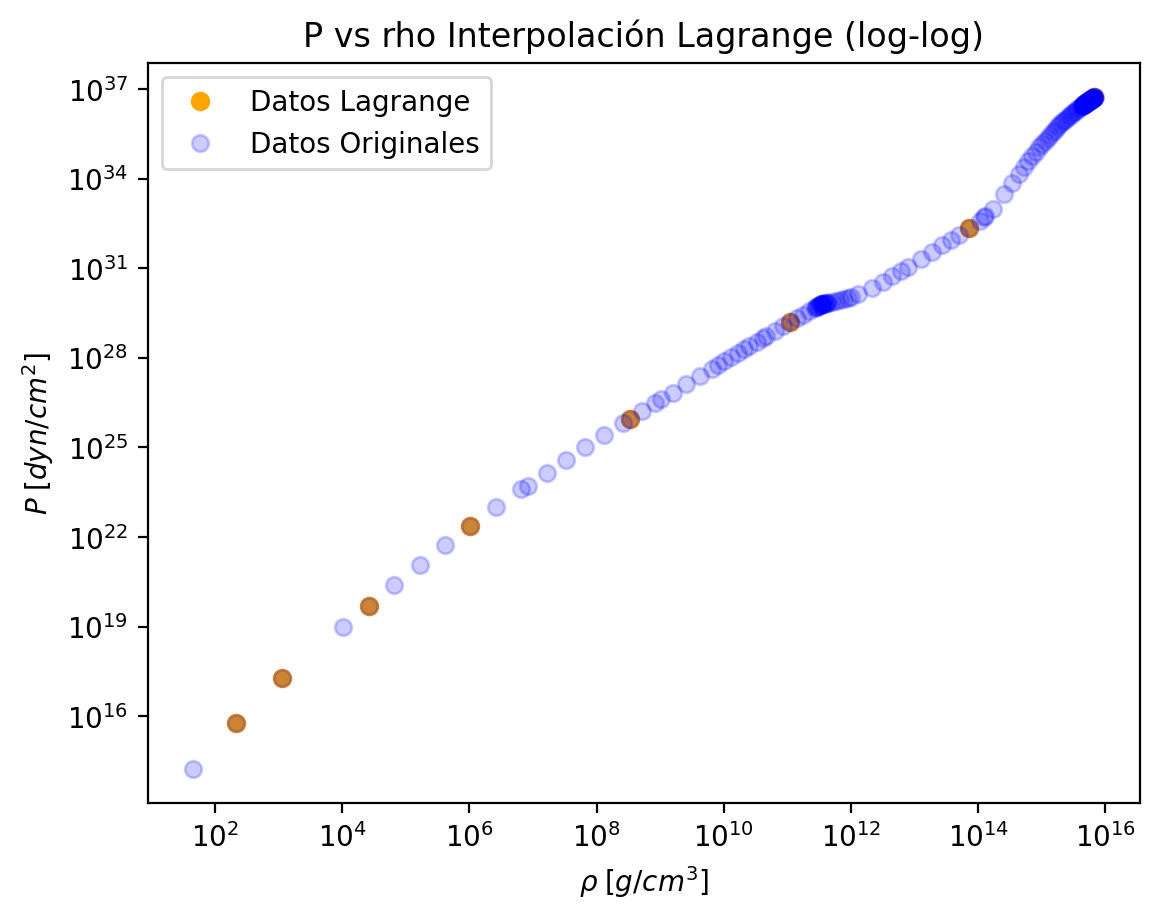

In [92]:
plt.plot(df_lg["rho[g/cm^3]"], df_lg["P[dyn/cm^2]"], marker='o', color='orange', linestyle='none', label='Datos Lagrange')
plt.plot(x_0, y_0, marker='o', color='blue', linestyle='none', alpha=0.2, label='Datos Originales')
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\rho\;[g/cm^3]$")
plt.ylabel(r"$P\;[dyn/cm^2]$")
plt.title("P vs rho Interpolación Lagrange (log-log)")
plt.show()

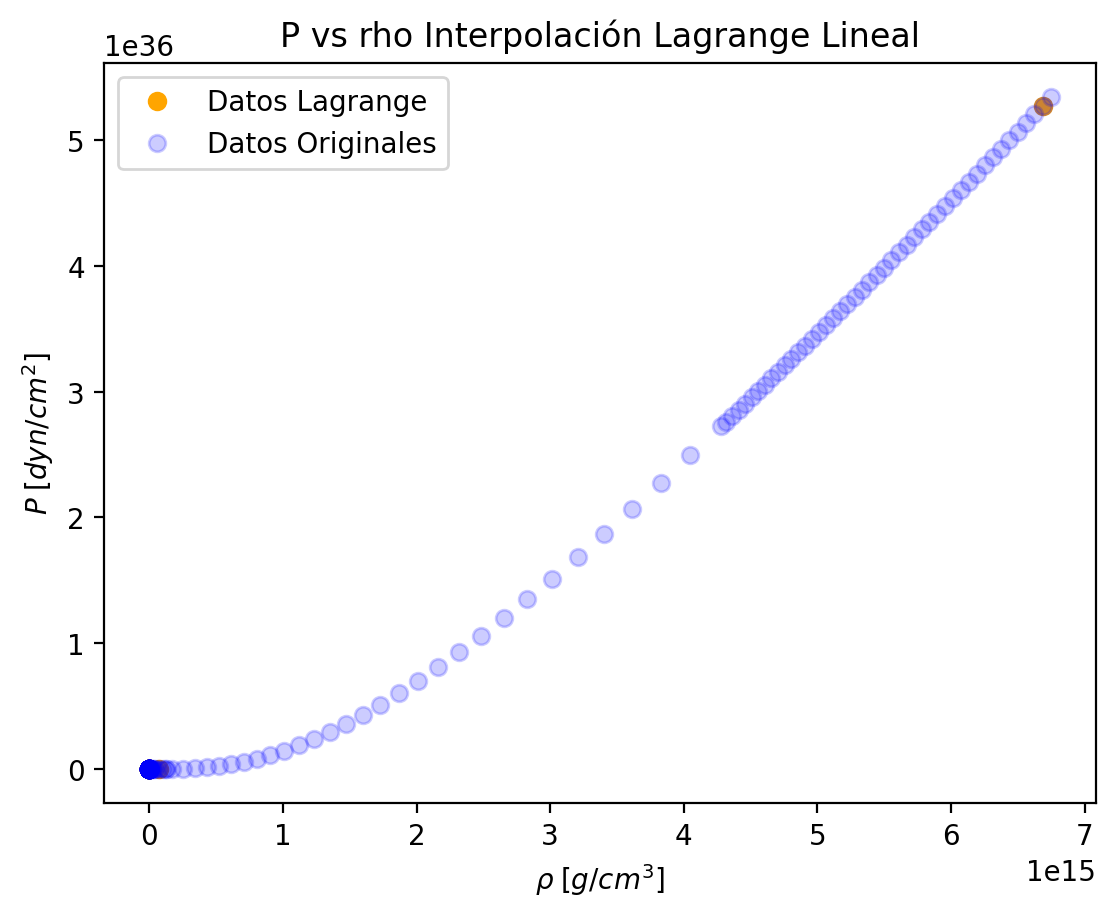

In [93]:
plt.plot(df_lg["rho[g/cm^3]"], df_lg["P[dyn/cm^2]"], marker='o', color='orange', linestyle='none', label = 'Datos Lagrange')
plt.plot(x_0, y_0, marker='o', color='blue', linestyle='none', alpha=0.2, label='Datos Originales')
plt.legend()
plt.xscale("linear")
plt.yscale("linear")
plt.xlabel(r"$\rho\;[g/cm^3]$")
plt.ylabel(r"$P\;[dyn/cm^2]$")
plt.title("P vs rho Interpolación Lagrange Lineal")
plt.show()

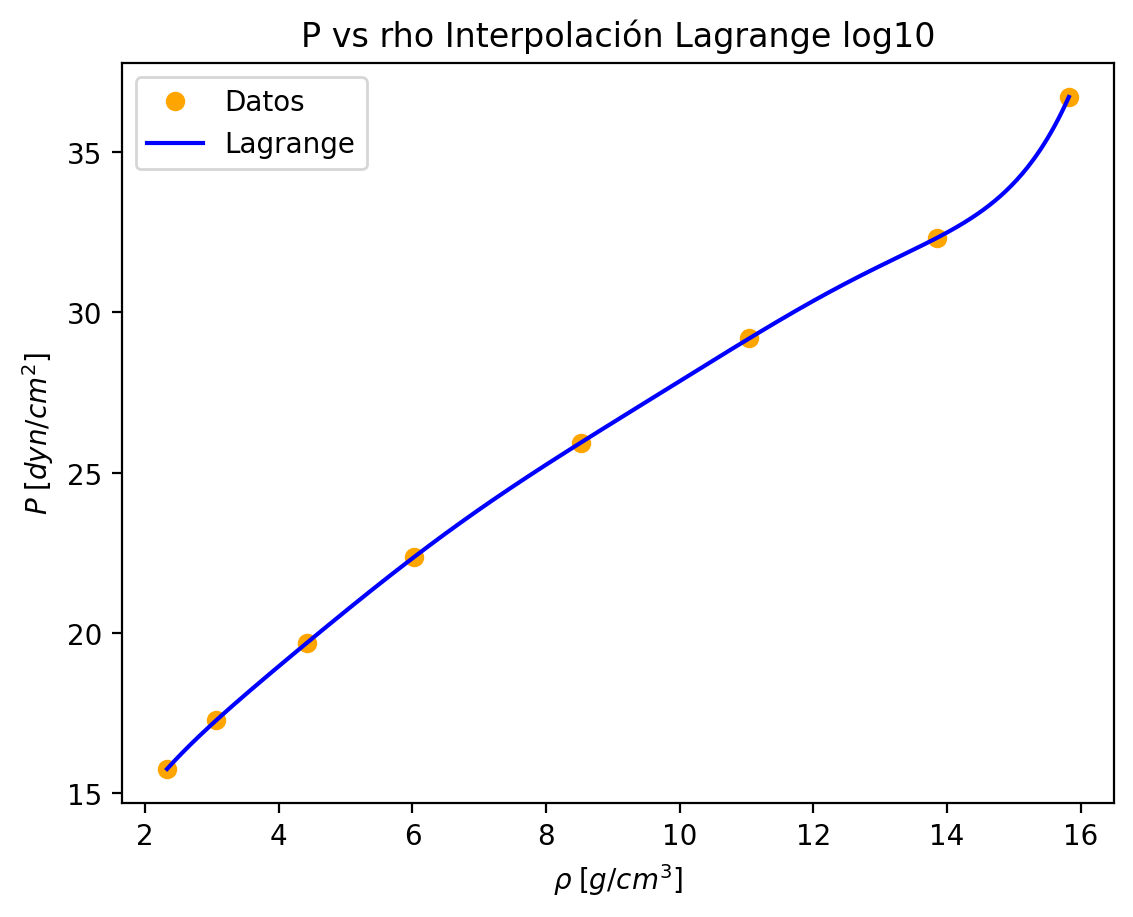

In [94]:
poly = lagrange(x_l, y_l)
x_new = np.linspace(min(x_l), max(x_l), 500)

# Gráfica compacta
plt.figure()
plt.plot(x_l, y_l, 'o', color='orange', label="Datos")
plt.plot(x_new, poly(x_new), color="blue", label="Lagrange")

plt.legend()
plt.xlabel(r"$\rho\;[g/cm^3]$")
plt.ylabel(r"$P\;[dyn/cm^2]$")
plt.title("P vs rho Interpolación Lagrange log10")
plt.show()

## Ecuación de Estado P(n_B)

In [95]:
x_l2 = np.log10(df_lg["n_B[fm^{-3}]"].values)
y_l2 = np.log10(df_lg["P[dyn/cm^2]"].values)
x_0 = dataframe["n_B[fm^{-3}]"].values
y_0 = dataframe["P[dyn/cm^2]"].values

# Ajuste lineal en log-log: y = gamma * x + logK
p, cov = np.polyfit(x_l2, y_l2, 1, cov=True)
gamma, logK = p[0], p[1]
gamma_err = np.sqrt(cov[0,0])
logK_err  = np.sqrt(cov[1,1])

K = 10**logK
K_err = K * np.log(10) * logK_err   # propagación aproximada de error

print(f"gamma = {gamma:.5f} ± {gamma_err:.5f}")
print(f"log10(K) = {logK:.5f} ± {logK_err:.5f}")
print(f"K = {K:.5e} ± {K_err:.5e}   (unidades: dyn/cm^2 / (g/cm^3)^gamma)")

gamma = 1.49301 ± 0.05132
log10(K) = 35.55189 ± 0.43689
K = 3.56357e+35 ± 3.58488e+35   (unidades: dyn/cm^2 / (g/cm^3)^gamma)


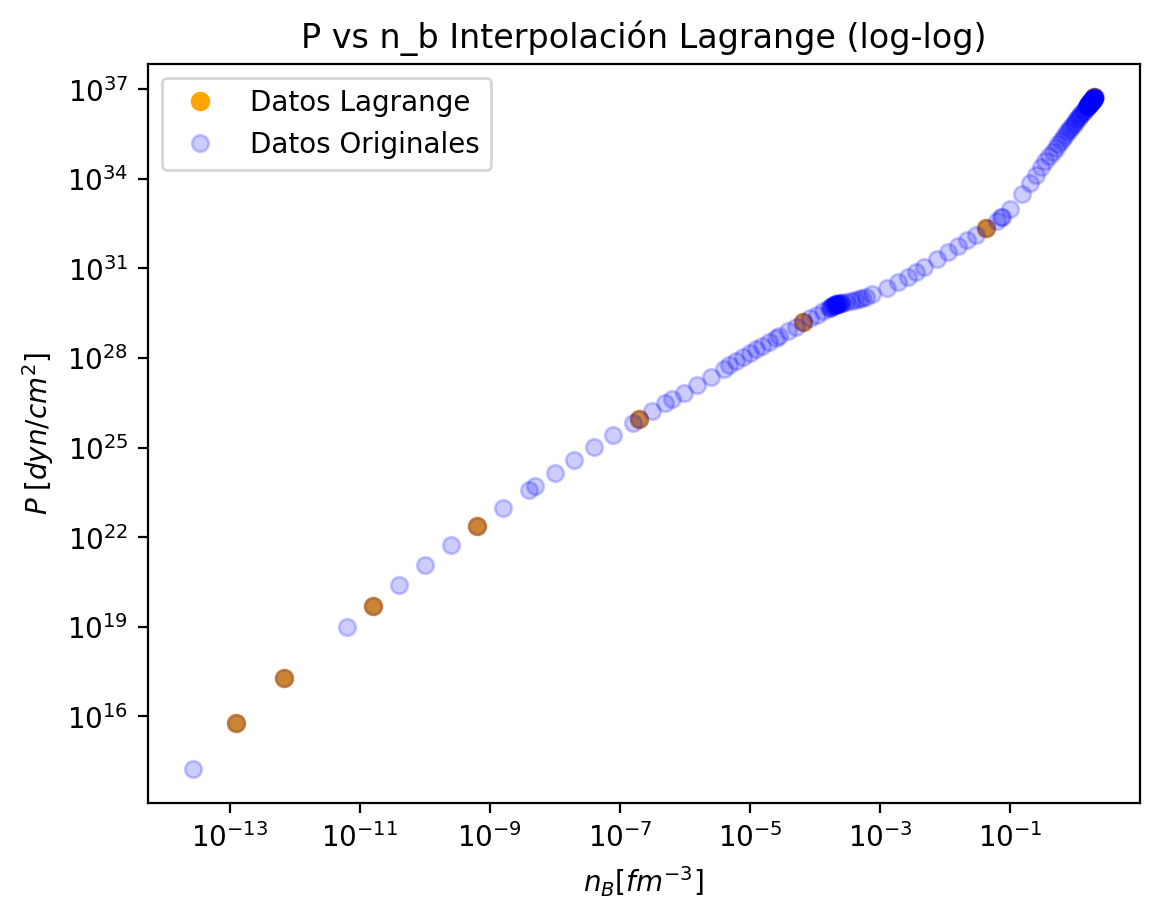

In [96]:
plt.plot(df_lg["n_B[fm^{-3}]"], df_lg["P[dyn/cm^2]"], marker='o', color='orange', linestyle='none', label='Datos Lagrange')
plt.plot(x_0, y_0, marker='o', color='blue', linestyle='none', alpha=0.2, label='Datos Originales')
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$n_B[fm^{-3}]$")
plt.ylabel(r"$P\;[dyn/cm^2]$")
plt.title("P vs n_b Interpolación Lagrange (log-log)")
plt.legend()
plt.show()

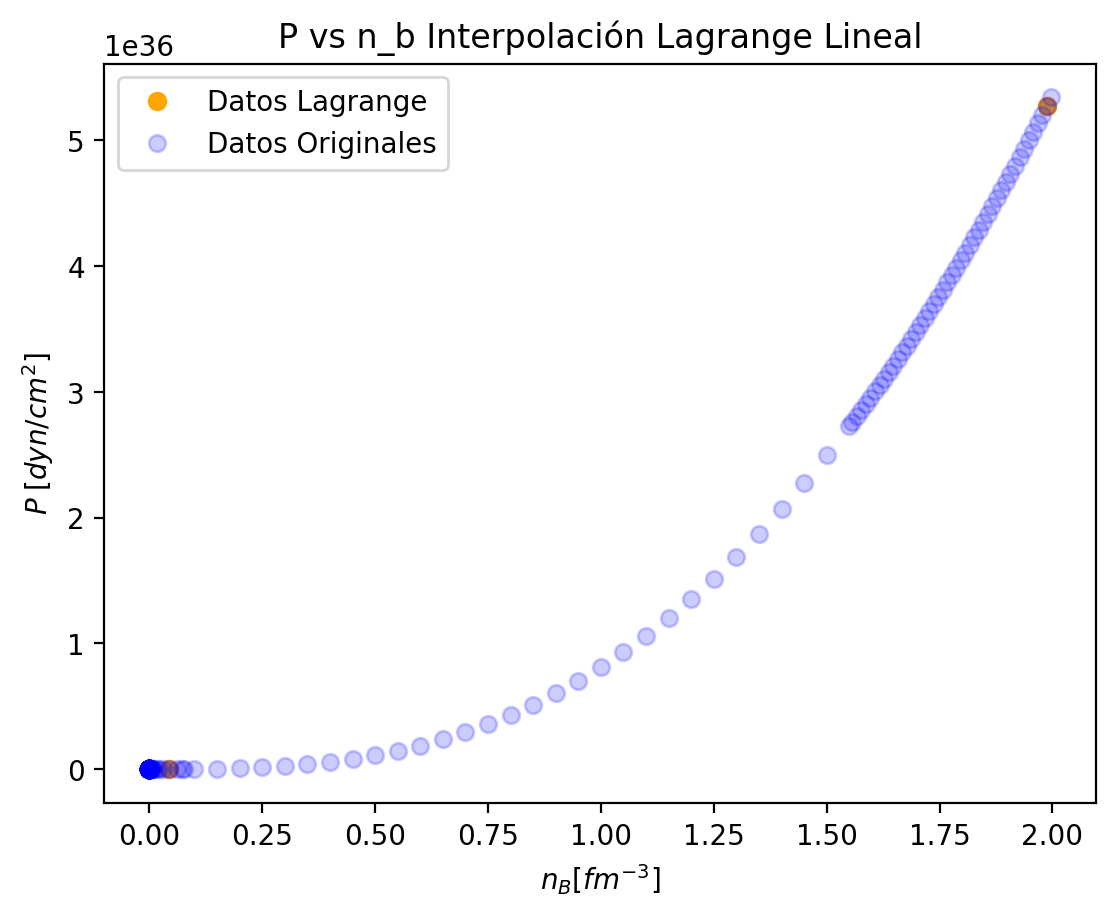

In [97]:
plt.plot(df_lg["n_B[fm^{-3}]"], df_lg["P[dyn/cm^2]"], marker='o', color='orange', linestyle='none', label='Datos Lagrange')
plt.plot(x_0, y_0, marker='o', color='blue', linestyle='none', alpha=0.2, label='Datos Originales')
plt.xlabel(r"$n_B[fm^{-3}]$")
plt.ylabel(r"$P\;[dyn/cm^2]$")
plt.title("P vs n_b Interpolación Lagrange Lineal")
plt.legend()
plt.show()

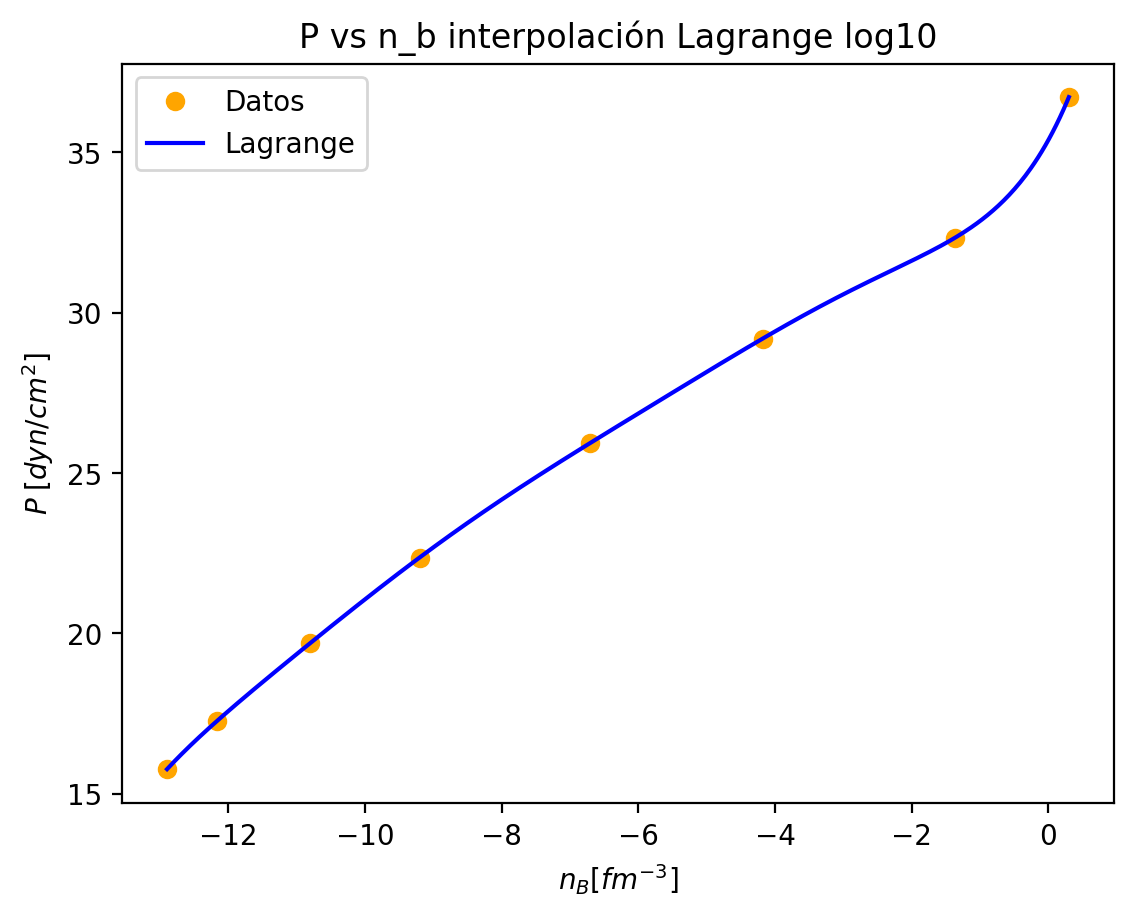

In [98]:
poly = lagrange(x_l2, y_l2)
x_new = np.linspace(min(x_l2), max(x_l2), 500)

# Gráfica compacta
plt.figure()
plt.plot(x_l2, y_l2, 'o', color='orange', label="Datos")
plt.plot(x_new, poly(x_new), color="blue", label="Lagrange")

plt.legend()
plt.xlabel(r"$n_B[fm^{-3}]$")
plt.ylabel(r"$P\;[dyn/cm^2]$")
plt.title("P vs n_b interpolación Lagrange log10")
plt.show()

#Interpolación con Spline Cúbico


## Ecuación de Estado P(rho)

### Sline Cúbico Natural

In [99]:
x_sc = np.log10(dataframe["rho[g/cm^3]"].values)
y_sc = np.log10(dataframe["P[dyn/cm^2]"].values)

# Ajuste lineal en log-log: y = gamma * x + logK
p, cov = np.polyfit(x_sc, y_sc, 1, cov=True)
gamma, logK = p[0], p[1]
gamma_err = np.sqrt(cov[0,0])
logK_err  = np.sqrt(cov[1,1])

K = 10**logK
K_err = K * np.log(10) * logK_err   # propagación aproximada de error

print(f"gamma = {gamma:.5f} ± {gamma_err:.5f}")
print(f"log10(K) = {logK:.5f} ± {logK_err:.5f}")
print(f"K = {K:.5e} ± {K_err:.5e}   (unidades: dyn/cm^2 / (g/cm^3)^gamma)")

gamma = 1.49787 ± 0.01133
log10(K) = 12.72606 ± 0.14985
K = 5.32187e+12 ± 1.83629e+12   (unidades: dyn/cm^2 / (g/cm^3)^gamma)


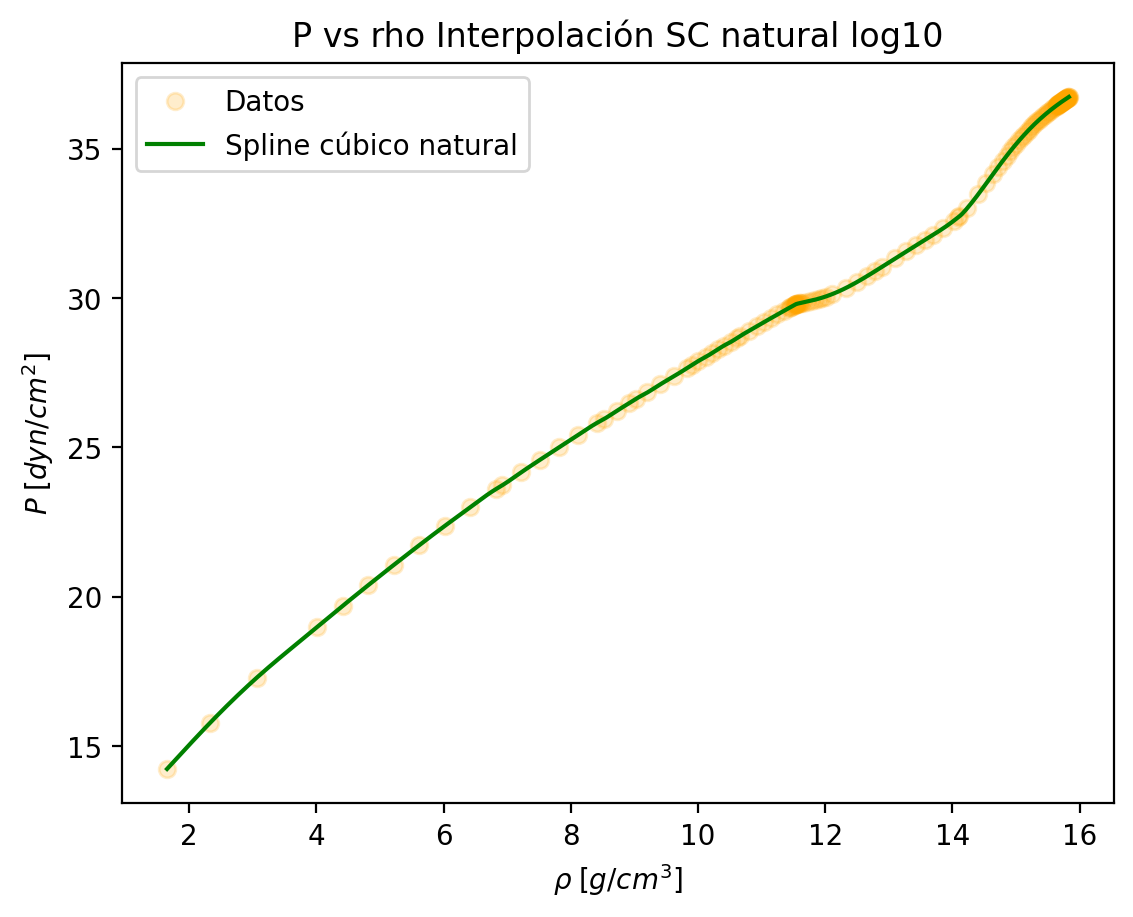

In [100]:
 # Interpolación con Spline cúbico natural
cs = CubicSpline(x_sc, y_sc, bc_type="natural")
x_new = np.linspace(min(x_sc), max(x_sc), 500)
y_new = cs(x_new)

plt.plot(x_sc, y_sc, marker='o', color='orange', linestyle='none', label="Datos", alpha=0.2)
plt.plot(x_new, y_new, label="Spline cúbico natural", color="green")
plt.legend()
plt.xlabel(r"$\rho\;[g/cm^3]$")
plt.ylabel(r"$P\;[dyn/cm^2]$")
plt.title("P vs rho Interpolación SC natural log10")
plt.show()

### Sline Cúbico not-a-knot

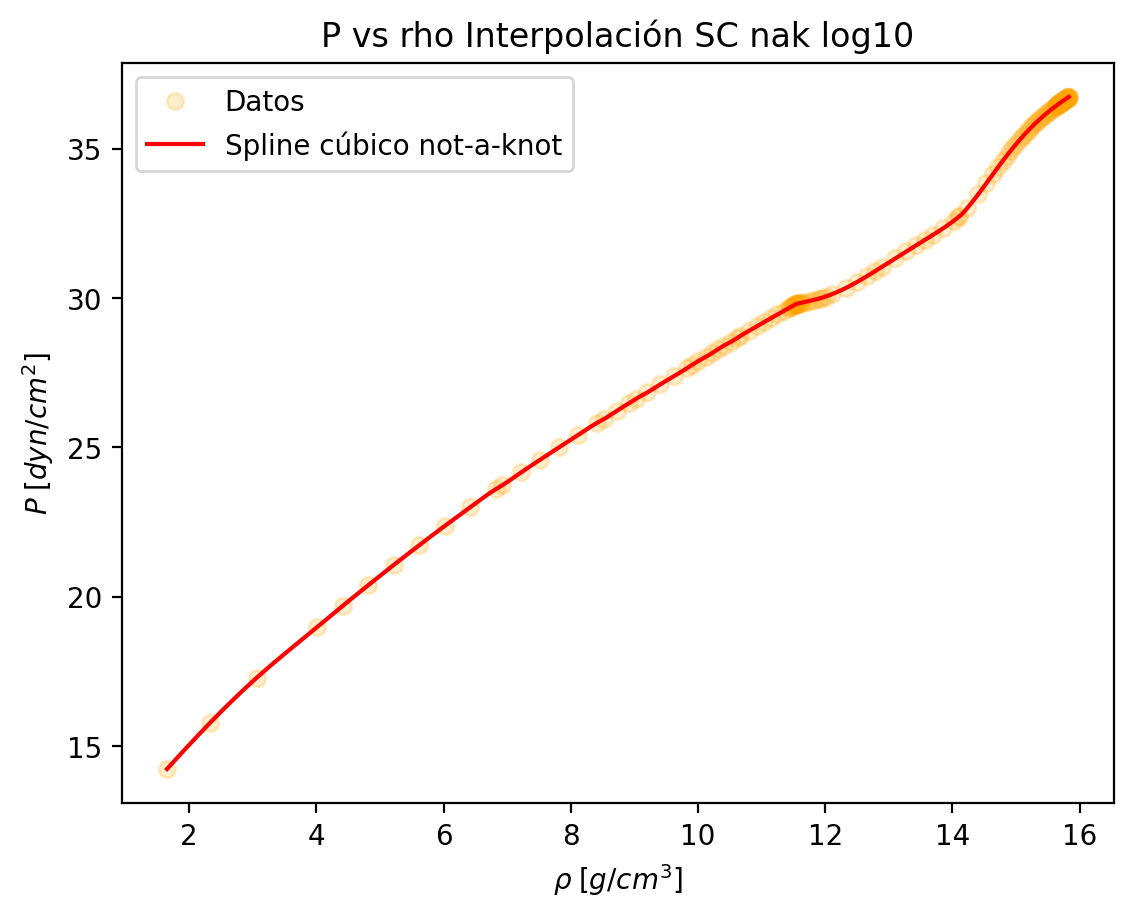

In [101]:
#exige que el tercer polinomio cúbico sea el mismo que el primero y el último
#y que es flexible dice el chato

cs_notaknot = CubicSpline(x_sc, y_sc, bc_type="not-a-knot")
x_new = np.linspace(min(x_sc), max(x_sc), 500)


plt.figure()
plt.plot(x_sc, y_sc, 'o', color='orange', label="Datos", alpha=0.2)
plt.plot(x_new, cs_notaknot(x_new), color="red", label="Spline cúbico not-a-knot")
plt.legend()
plt.xlabel(r"$\rho\;[g/cm^3]$")
plt.ylabel(r"$P\;[dyn/cm^2]$")
plt.title("P vs rho Interpolación SC nak log10")
plt.show()

##Ecuación de Estado P(n_B)

### Sline Cúbico Natural

In [102]:
x_sc2 = np.log10(dataframe["n_B[fm^{-3}]"].values)
y_sc2 = np.log10(dataframe["P[dyn/cm^2]"].values)

# Ajuste lineal en log-log: y = gamma * x + logK
p, cov = np.polyfit(x_sc2, y_sc2, 1, cov=True)
gamma, logK = p[0], p[1]
gamma_err = np.sqrt(cov[0,0])
logK_err  = np.sqrt(cov[1,1])

K = 10**logK
K_err = K * np.log(10) * logK_err   # propagación aproximada de error

print(f"gamma = {gamma:.5f} ± {gamma_err:.5f}")
print(f"log10(K) = {logK:.5f} ± {logK_err:.5f}")
print(f"K = {K:.5e} ± {K_err:.5e}   (unidades: dyn/cm^2 / (g/cm^3)^gamma)")

gamma = 1.53258 ± 0.01398
log10(K) = 35.75912 ± 0.05771
K = 5.74281e+35 ± 7.63130e+34   (unidades: dyn/cm^2 / (g/cm^3)^gamma)


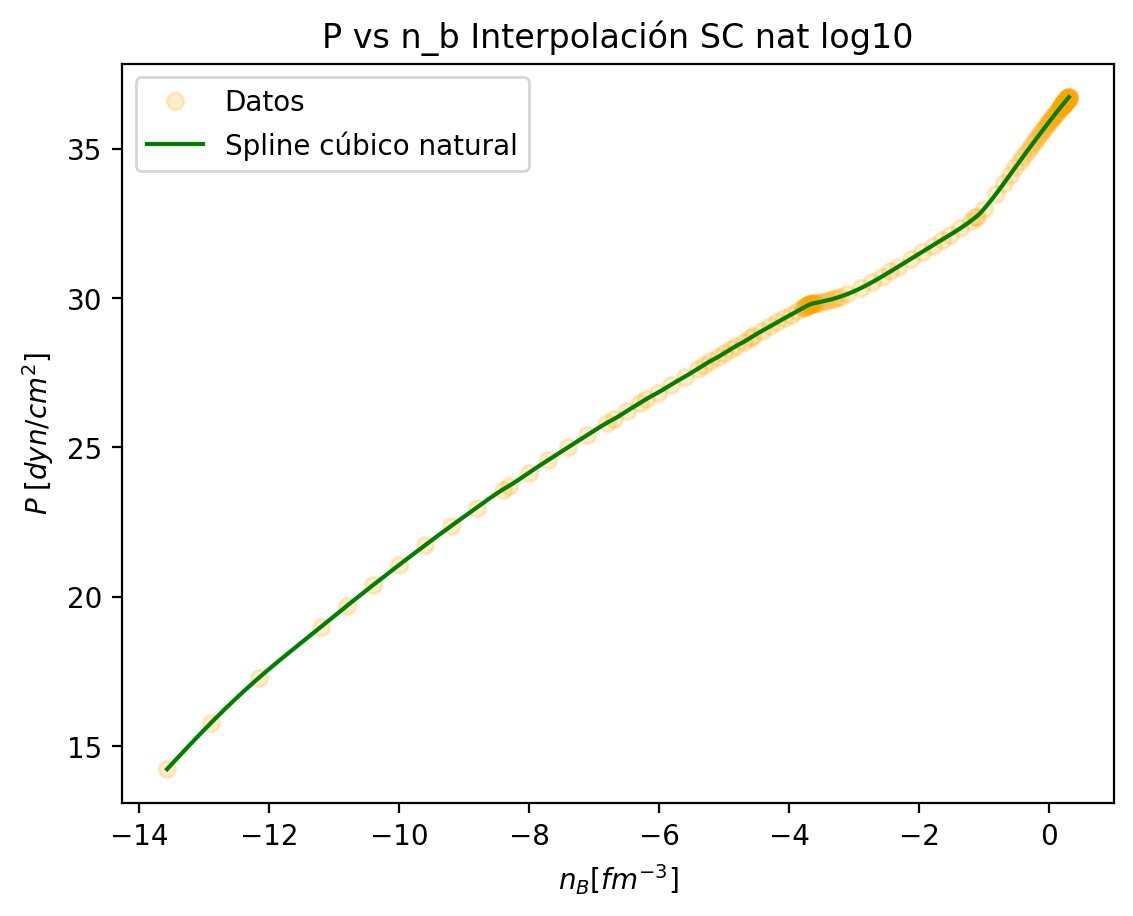

In [103]:
# Interpolación con Spline cúbico natural
cs = CubicSpline(x_sc2, y_sc2, bc_type="natural")
x_new = np.linspace(min(x_sc2), max(x_sc2), 500)
y_new = cs(x_new)

plt.plot(x_sc2, y_sc2, marker='o', color='orange', linestyle='none', label="Datos", alpha=0.2)
plt.plot(x_new, y_new, label="Spline cúbico natural", color="green")
plt.legend()
plt.xlabel(r"$n_B[fm^{-3}]$")
plt.ylabel(r"$P\;[dyn/cm^2]$")
plt.title("P vs n_b Interpolación SC nat log10")
plt.show()

### Sline Cúbico not a knot


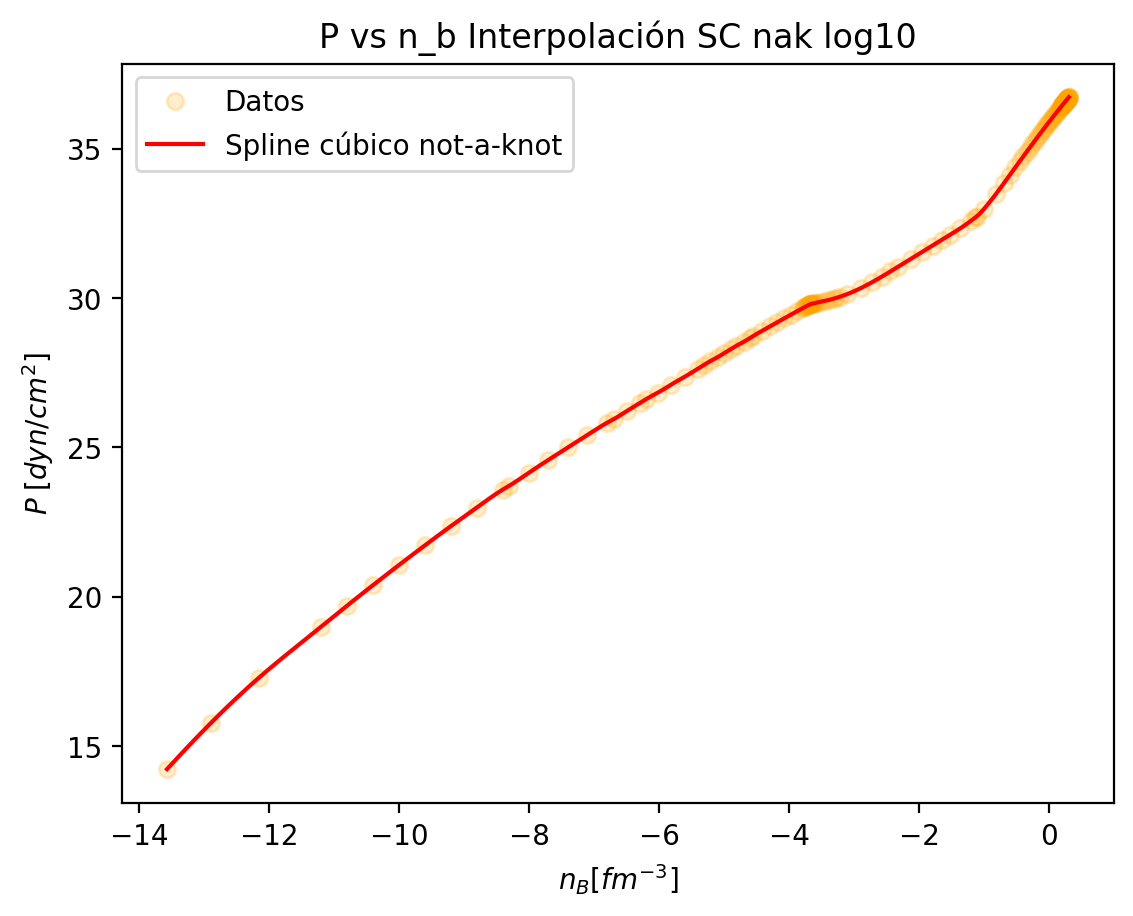

In [104]:
cs_notaknot = CubicSpline(x_sc2, y_sc2, bc_type="not-a-knot")
x_new = np.linspace(min(x_sc2), max(x_sc2), 500)

plt.figure()
plt.plot(x_sc2, y_sc2, 'o', color='orange', label="Datos", alpha=0.2)
plt.plot(x_new, cs_notaknot(x_new), color="red", label="Spline cúbico not-a-knot")
plt.legend()
plt.xlabel(r"$n_B[fm^{-3}]$")
plt.ylabel(r"$P\;[dyn/cm^2]$")
plt.title("P vs n_b Interpolación SC nak log10")
plt.show()

#Interpolación con Pchip


##Ecuación de Estado P(rho)

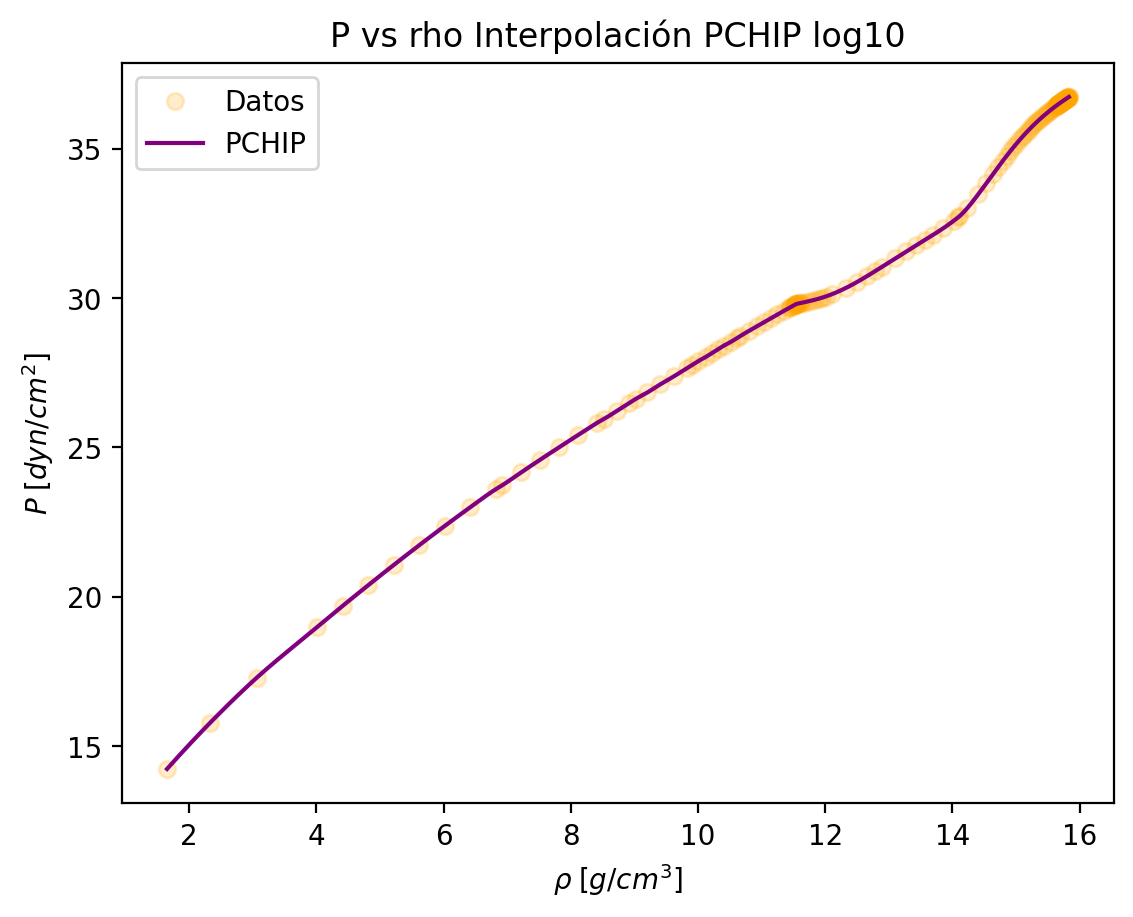

In [105]:
pchip = PchipInterpolator(x_sc, y_sc)
x_new = np.linspace(min(x_sc), max(x_sc), 500)
# Gráfica compacta
plt.figure()
plt.plot(x_sc, y_sc, 'o', color='orange', label="Datos", alpha=0.2)
plt.plot(x_new, pchip(x_new), color="purple", label="PCHIP")
plt.legend()
plt.xlabel(r"$\rho\;[g/cm^3]$")
plt.ylabel(r"$P\;[dyn/cm^2]$")
plt.title("P vs rho Interpolación PCHIP log10")
plt.show()

##Ecuación de Estado P(n_B)

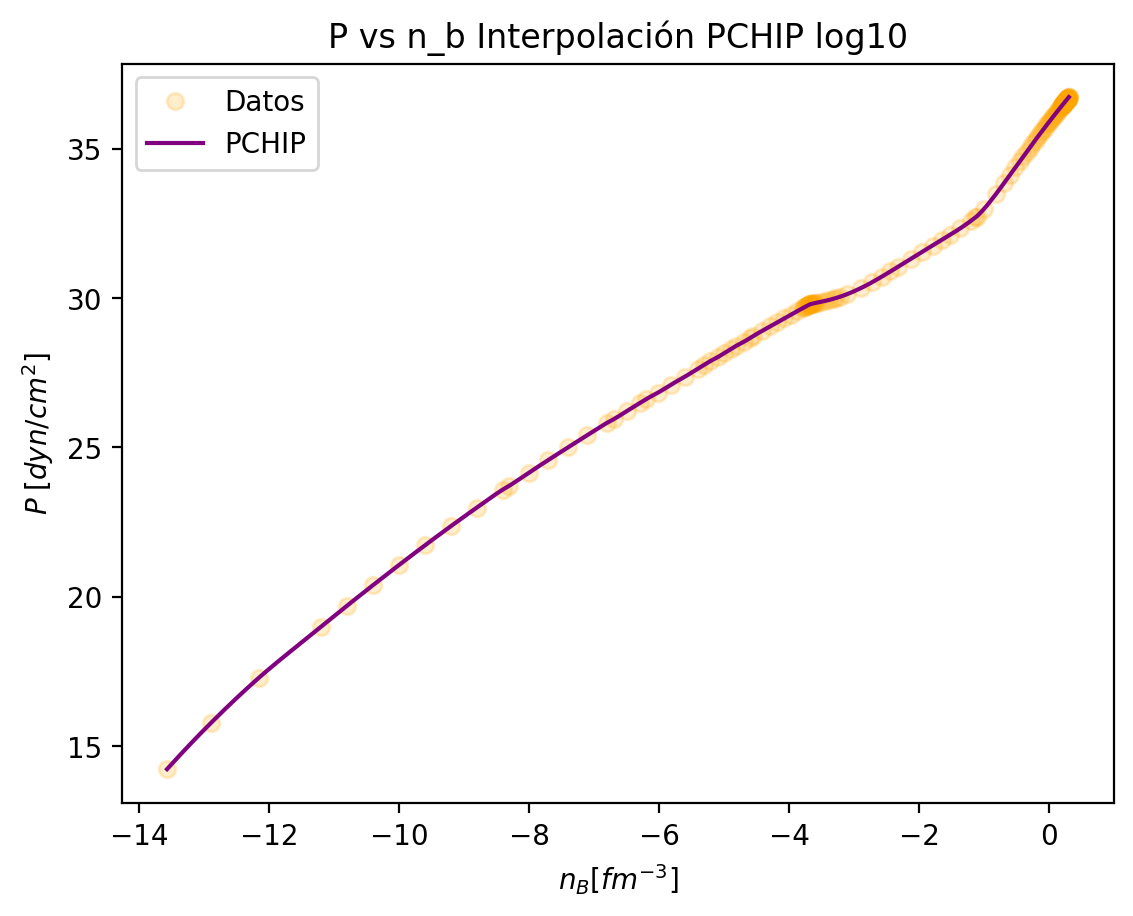

In [106]:
pchip = PchipInterpolator(x_sc2, y_sc2)
x_new = np.linspace(min(x_sc2), max(x_sc2), 500)
# Gráfica compacta
plt.figure()
plt.plot(x_sc2, y_sc2, 'o', color='orange', label="Datos", alpha=0.2)
plt.plot(x_new, pchip(x_new), color="purple", label="PCHIP")
plt.legend()
plt.xlabel(r"$n_B[fm^{-3}]$")
plt.ylabel(r"$P\;[dyn/cm^2]$")
plt.title("P vs n_b Interpolación PCHIP log10")
plt.show()

##Grupos train y test solo para P(rho) y P(n_b) solo para lagrange

In [107]:
#Grupos para la varibale independiente n_b

rng = np.random.default_rng(42) #Usamos siempre la misma semilla

n = 2 #Hay que reducir los intervalos pq son pocos datos
rango = np.linspace(x_l.min(), x_l.max(), n+1)
bin_idx = np.digitize(x_l, rango) - 1

train_mask = np.zeros(len(x_l), dtype=bool)
test_mask  = np.zeros(len(x_l), dtype=bool)

porcentaje = 0.7 # 70% en entrenamiento

for b in range(n):
    idx_in_bin = np.where(bin_idx == b)[0]
    if len(idx_in_bin) == 0:
        continue
    n_train = max(1, int(np.round(len(idx_in_bin) * porcentaje)))
    sel = rng.choice(idx_in_bin, size=len(idx_in_bin), replace=False)
    train_idx = sel[:n_train]
    test_idx  = sel[n_train:]
    train_mask[train_idx] = True
    test_mask[test_idx] = True

# conjuntos resultantes:
x_train_l, y_train_l = x_l[train_mask], y_l[train_mask]
x_test_l,  y_test_l  = x_l[test_mask],  y_l[test_mask]

print(f"Para x, los datos de entrenamiento son: \n\n {x_train_l} \n\n y los de testeo son: \n\n {x_test_l}")

print("\n ======================================== \n")

#Grupos para la variable aleatoria

rng = np.random.default_rng(42) #Usamos siempre la misma semilla

rango = np.linspace(x_l2.min(), x_l2.max(), n+1)
bin_idx = np.digitize(x_l2, rango) - 1

train_mask = np.zeros(len(x_l2), dtype=bool)
test_mask  = np.zeros(len(x_l2), dtype=bool)

for b in range(n):
    idx_in_bin = np.where(bin_idx == b)[0]
    if len(idx_in_bin) == 0:
        continue
    n_train = max(1, int(np.round(len(idx_in_bin) * porcentaje)))
    sel = rng.choice(idx_in_bin, size=len(idx_in_bin), replace=False)
    train_idx = sel[:n_train]
    test_idx  = sel[n_train:]
    train_mask[train_idx] = True
    test_mask[test_idx] = True

# conjuntos resultantes:
x_train_l2, y_train_l2 = x_l2[train_mask], y_l2[train_mask]
x_test_l2,  y_test_l2  = x_l2[test_mask],  y_l2[test_mask]

print(f"Para x, los datos de entrenamiento son: \n\n {x_train_l2} \n\n y los de testeo son: \n\n {x_test_l2}")

Para x, los datos de entrenamiento son: 

 [ 2.32633586  3.06069784  6.0187005   8.51917146 13.85745312] 

 y los de testeo son: 

 [ 4.41863269 11.04139269]


Para x, los datos de entrenamiento son: 

 [-12.89619628 -12.15926677  -9.20107326  -6.70092874  -1.36977559] 

 y los de testeo son: 

 [-10.80106813  -4.1809828 ]


###Grupos train y test para P(rho)

In [108]:
rng = np.random.default_rng(42) #Usamos siempre la misma semilla

n = 8
rango = np.linspace(x_sc.min(), x_sc.max(), n+1)
bin_idx = np.digitize(x_sc, rango) - 1

train_mask = np.zeros(len(x_sc), dtype=bool)
test_mask  = np.zeros(len(x_sc), dtype=bool)

porcentaje = 0.8 # 80% en entrenamiento

for b in range(n):
    idx_in_bin = np.where(bin_idx == b)[0]
    if len(idx_in_bin) == 0:
        continue
    n_train = max(1, int(np.round(len(idx_in_bin) * porcentaje)))
    sel = rng.choice(idx_in_bin, size=len(idx_in_bin), replace=False)
    train_idx = sel[:n_train]
    test_idx  = sel[n_train:]
    train_mask[train_idx] = True
    test_mask[test_idx] = True

# conjuntos resultantes:
x_train_sc, y_train_sc = x_sc[train_mask], y_sc[train_mask]
x_test_sc,  y_test_sc  = x_sc[test_mask],  y_sc[test_mask]

###Grupos train y test para P(n_b)

In [109]:
rng = np.random.default_rng(42) #Usamos siempre la misma semilla

n = 8
rango = np.linspace(x_sc2.min(), x_sc2.max(), n+1)
bin_idx = np.digitize(x_sc2, rango) - 1

train_mask = np.zeros(len(x_sc2), dtype=bool)
test_mask  = np.zeros(len(x_sc2), dtype=bool)

porcentaje = 0.8 # 80% en entrenamiento

for b in range(n):
    idx_in_bin = np.where(bin_idx == b)[0]
    if len(idx_in_bin) == 0:
        continue
    n_train = max(1, int(np.round(len(idx_in_bin) * porcentaje)))
    sel = rng.choice(idx_in_bin, size=len(idx_in_bin), replace=False)
    train_idx = sel[:n_train]
    test_idx  = sel[n_train:]
    train_mask[train_idx] = True
    test_mask[test_idx] = True

# conjuntos resultantes:
x_train_sc2, y_train_sc2 = x_sc2[train_mask], y_sc2[train_mask]
x_test_sc2,  y_test_sc2  = x_sc2[test_mask],  y_sc2[test_mask]

#Calculo del Error

In [110]:
#Variables para el calculo con rho

poly       = lagrange(x_l, y_l)
cs_natural = CubicSpline(x_sc, y_sc, bc_type="natural")
cs_not     = CubicSpline(x_sc, y_sc, bc_type="not-a-knot")
pchip      = PchipInterpolator(x_sc, y_sc)

#Variables para el calculo con n_b

poly2       = lagrange(x_l2, y_l2)
cs_natural2 = CubicSpline(x_sc2, y_sc2, bc_type="natural")
cs_not2     = CubicSpline(x_sc2, y_sc2, bc_type="not-a-knot")
pchip2      = PchipInterpolator(x_sc2, y_sc2)

In [111]:
#Calculo del error cuadratico para la variable rho

print("El error cuadratico para las interpolaciones de P(rho) \n")

MSE_poly       = np.mean((y_l - poly(x_l))**2)
MSE_cs_nat     = np.mean((y_sc - cs_natural(x_sc))**2)
MSE_cs_not     = np.mean((y_sc - cs_not(x_sc))**2)
MSE_pchip      = np.mean((y_sc - pchip(x_sc))**2)

print(f"MSE Lagrange       : {MSE_poly:.4e}")
print(f"MSE Spline natural : {MSE_cs_nat:.4e}")
print(f"MSE Spline not-a-knot : {MSE_cs_not:.4e}")
print(f"MSE PCHIP          : {MSE_pchip:.4e}")

#Calculo del error cuadratico para la variable n_b

print("\n ============================ \n")
print("El error cuadratico para las interpolaciones de P(n_b) \n")


MSE_poly2       = np.mean((y_l2 - poly2(x_l2))**2)
MSE_cs_nat2     = np.mean((y_sc2 - cs_natural2(x_sc2))**2)
MSE_cs_not2     = np.mean((y_sc2 - cs_not2(x_sc2))**2)
MSE_pchip2      = np.mean((y_sc2 - pchip2(x_sc2))**2)

print(f"MSE Lagrange       : {MSE_poly2:.4e}")
print(f"MSE Spline natural : {MSE_cs_nat2:.4e}")
print(f"MSE Spline not-a-knot : {MSE_cs_not2:.4e}")
print(f"MSE PCHIP          : {MSE_pchip2:.4e}")

El error cuadratico para las interpolaciones de P(rho) 

MSE Lagrange       : 2.4343e-21
MSE Spline natural : 3.3215e-31
MSE Spline not-a-knot : 0.0000e+00
MSE PCHIP          : 0.0000e+00


El error cuadratico para las interpolaciones de P(n_b) 

MSE Lagrange       : 3.0281e-21
MSE Spline natural : 0.0000e+00
MSE Spline not-a-knot : 0.0000e+00
MSE PCHIP          : 0.0000e+00


In [112]:
#Calculo del error absoluto para la variable n_b

print("El error absoluto para la interpolaciones de P(rho) \n")


MSA_poly3       = np.mean(np.abs(y_l - poly(x_l)))
MSA_cs_nat3     = np.mean(np.abs(y_sc - cs_natural(x_sc)))
MSA_cs_not3     = np.mean(np.abs(y_sc - cs_not(x_sc)))
MSA_pchip3      = np.mean(np.abs(y_sc - pchip(x_sc)))

print(f"MSA Lagrange       : {MSA_poly3:.4e}")
print(f"MSA Spline natural : {MSA_cs_nat3:.4e}")
print(f"MSA Spline not-a-knot : {MSA_cs_not3:.4e}")
print(f"MSA PCHIP          : {MSA_pchip3:.4e}")

#Calculo del error absoluto para la variable n_b

print("\n ============================ \n")
print("El error absoluto para las interpolaciones de P(n_b) \n")


MSA_poly4       = np.mean(np.abs(y_l2 - poly2(x_l2)))
MSA_cs_nat4     = np.mean(np.abs(y_sc2 - cs_natural2(x_sc2)))
MSA_cs_not4     = np.mean(np.abs(y_sc2 - cs_not2(x_sc2)))
MSA_pchip4      = np.mean(np.abs(y_sc2 - pchip2(x_sc2)))

print(f"MSA Lagrange       : {MSA_poly4:.4e}")
print(f"MSA Spline natural : {MSA_cs_nat4:.4e}")
print(f"MSA Spline not-a-knot : {MSA_cs_not4:.4e}")
print(f"MSA PCHIP          : {MSA_pchip4:.4e}")

El error absoluto para la interpolaciones de P(rho) 

MSA Lagrange       : 2.6432e-11
MSA Spline natural : 4.6746e-17
MSA Spline not-a-knot : 0.0000e+00
MSA PCHIP          : 0.0000e+00


El error absoluto para las interpolaciones de P(n_b) 

MSA Lagrange       : 3.4429e-11
MSA Spline natural : 0.0000e+00
MSA Spline not-a-knot : 0.0000e+00
MSA PCHIP          : 0.0000e+00


##Gráfricas de Error Cuadrado y Absoluto para P(rho)

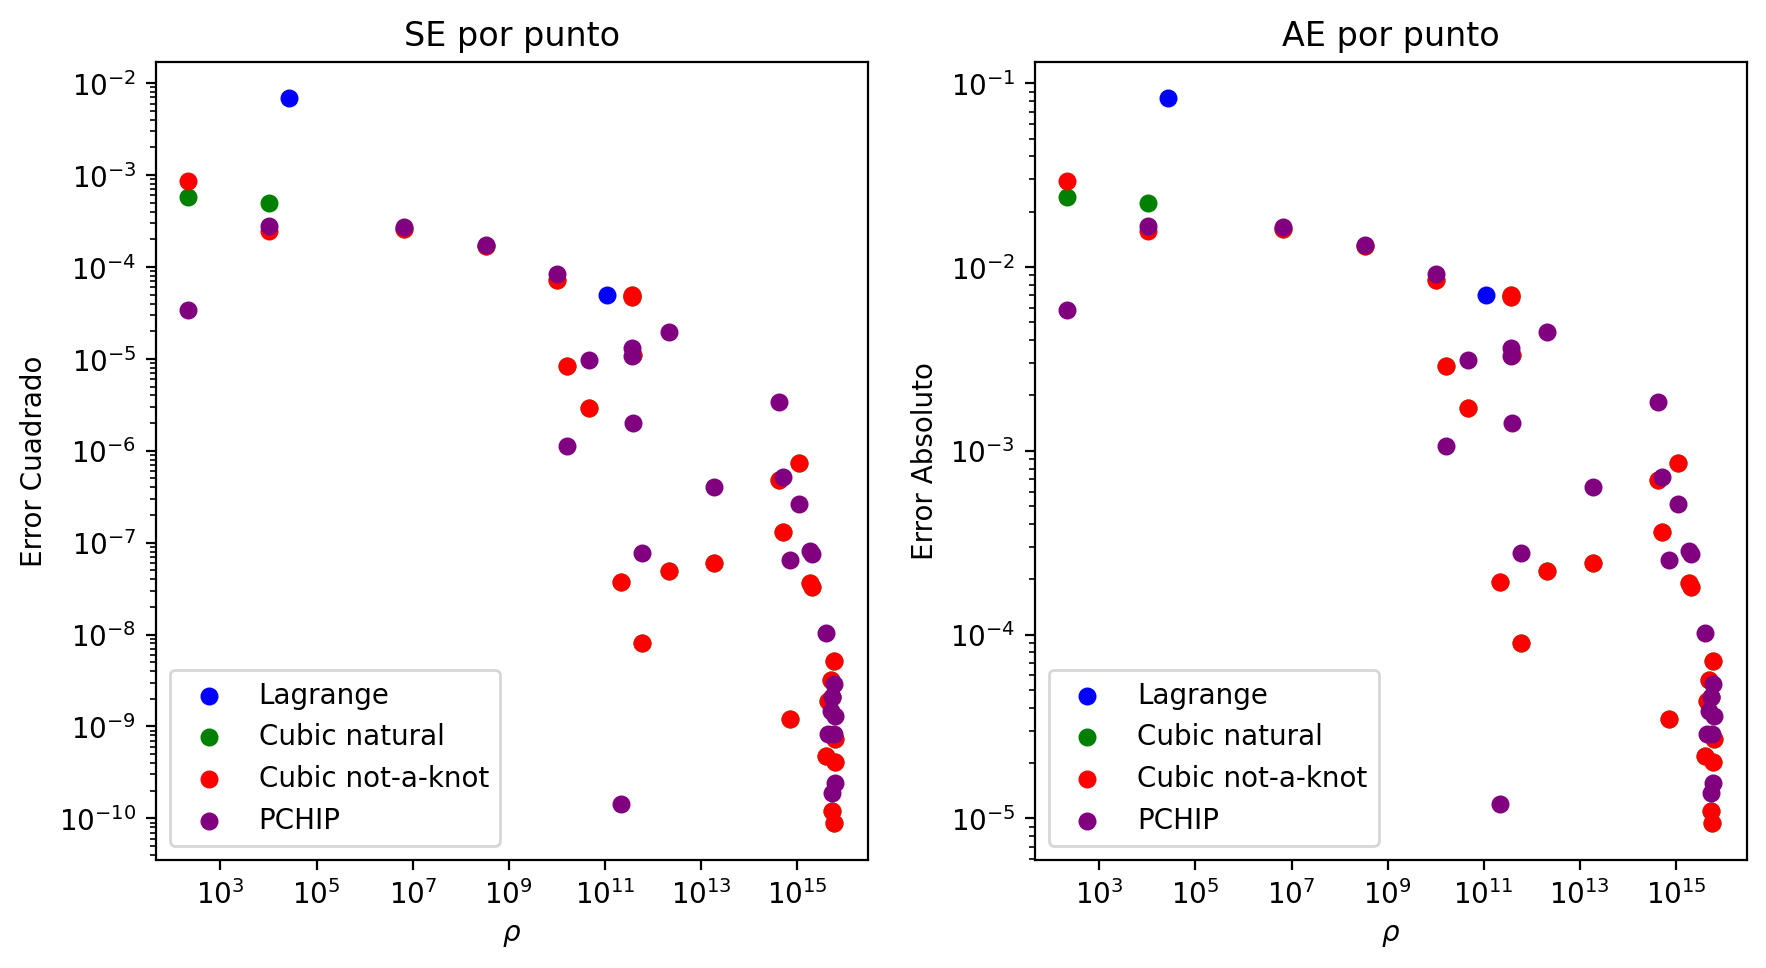

In [113]:
# Interpolamos los datos de train
cs_train_l = lagrange(x_train_l, y_train_l)
cs_train_nat = CubicSpline(x_train_sc, y_train_sc, bc_type='natural')
cs_train_nok = CubicSpline(x_train_sc, y_train_sc, bc_type='not-a-knot')
pchip_train  = PchipInterpolator(x_train_sc, y_train_sc)

# Evaluamos en test
yhat_l = cs_train_l(x_test_l)
yhat_cs_nat = cs_train_nat(x_test_sc)
yhat_cs_nak = cs_train_nok(x_test_sc)
yhat_pchip  = pchip_train(x_test_sc)

# Errores en log-space
se_l = (yhat_l - y_test_l)**2
ae_l = np.abs(yhat_l - y_test_l)

se_cs_nat = (yhat_cs_nat - y_test_sc)**2
ae_cs_nat = np.abs(yhat_cs_nat - y_test_sc)

se_cs_nak = (yhat_cs_nak - y_test_sc)**2
ae_cs_nak = np.abs(yhat_cs_nak - y_test_sc)

se_pchip = (yhat_pchip - y_test_sc)**2
ae_pchip = np.abs(yhat_pchip - y_test_sc)

plt.figure(figsize=(9,5)) #Gráfica SE (Squared Error)
plt.subplot(1,2,1)
plt.scatter(10**x_test_l, se_l,       label='Lagrange',         color='blue', s=30)
plt.scatter(10**x_test_sc, se_cs_nat, label='Cubic natural',    color='green', s=30)
plt.scatter(10**x_test_sc, se_cs_nak, label='Cubic not-a-knot', color='red', s=30)
plt.scatter(10**x_test_sc, se_pchip,  label='PCHIP',            color='purple', s=30)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\rho$')
plt.ylabel('Error Cuadrado')
plt.legend(loc= 'lower left')
plt.title('SE por punto')

plt.subplot(1,2,2) #Gráfica AE (Absolute Error)
plt.scatter(10**x_test_l,  ae_l, color='blue',       label='Lagrange', s=30)
plt.scatter(10**x_test_sc, ae_cs_nat, color='green', label='Cubic natural', s=30)
plt.scatter(10**x_test_sc, ae_cs_nak, color='red',   label='Cubic not-a-knot', s=30)
plt.scatter(10**x_test_sc, ae_pchip, color='purple', label='PCHIP', s=30)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\rho$')
plt.ylabel('Error Absoluto')
plt.title('AE por punto')
plt.tight_layout()
plt.legend(loc= 'lower left')
plt.show()

##Gráfricas de Error Cuadrado y Absoluto para P(n_b)

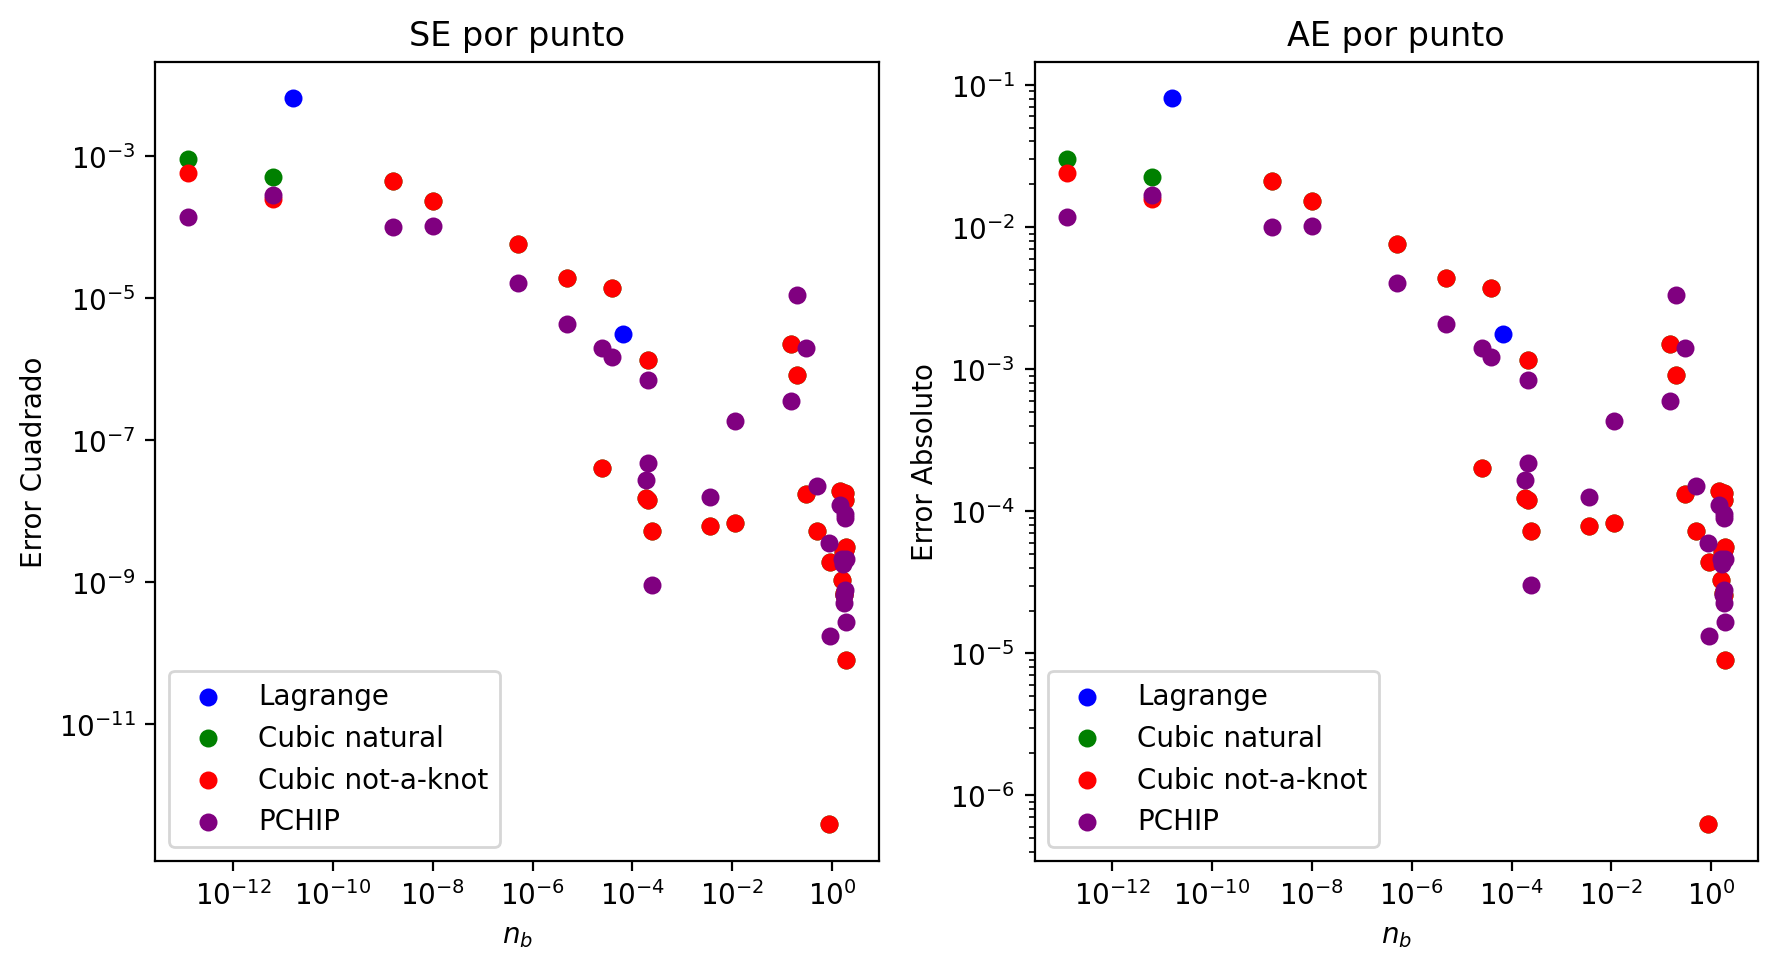

In [114]:
# Interpolamos los datos de train
cs_train_l2 = lagrange(x_train_l2, y_train_l2)
cs_train_nat2 = CubicSpline(x_train_sc2, y_train_sc2, bc_type='natural')
cs_train_nok2 = CubicSpline(x_train_sc2, y_train_sc2, bc_type='not-a-knot')
pchip_train2  = PchipInterpolator(x_train_sc2, y_train_sc2)

# Evaluamos en test
yhat_l2 = cs_train_l2(x_test_l2)
yhat_cs_nat2 = cs_train_nat2(x_test_sc2)
yhat_cs_nak2 = cs_train_nok2(x_test_sc2)
yhat_pchip2 = pchip_train2(x_test_sc2)

# Errores en log-space
se_l2 = (yhat_l2 - y_test_l2)**2
ae_l2 = np.abs(yhat_l2 - y_test_l2)

se_cs_nat2 = (yhat_cs_nat2 - y_test_sc2)**2
ae_cs_nat2 = np.abs(yhat_cs_nat2 - y_test_sc2)

se_cs_nak2 = (yhat_cs_nak2 - y_test_sc2)**2
ae_cs_nak2 = np.abs(yhat_cs_nak2 - y_test_sc2)

se_pchip2 = (yhat_pchip2 - y_test_sc2)**2
ae_pchip2 = np.abs(yhat_pchip2 - y_test_sc2)

plt.figure(figsize=(9,5)) #Gráfica SE (Squared Error)
plt.subplot(1,2,1)
plt.scatter(10**x_test_l2, se_l2,       label='Lagrange',         color='blue', s=30)
plt.scatter(10**x_test_sc2, se_cs_nat2, label='Cubic natural',    color='green', s=30)
plt.scatter(10**x_test_sc2, se_cs_nak2, label='Cubic not-a-knot', color='red', s=30)
plt.scatter(10**x_test_sc2, se_pchip2,  label='PCHIP',            color='purple', s=30)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$n_b$')
plt.ylabel('Error Cuadrado')
plt.legend(loc= 'lower left')
plt.title('SE por punto')

plt.subplot(1,2,2) #Gráfica AE (Absolute Error)
plt.scatter(10**x_test_l2,  ae_l2, color='blue',       label='Lagrange', s=30)
plt.scatter(10**x_test_sc2, ae_cs_nat2, color='green', label='Cubic natural', s=30)
plt.scatter(10**x_test_sc2, ae_cs_nak2, color='red',   label='Cubic not-a-knot', s=30)
plt.scatter(10**x_test_sc2, ae_pchip2, color='purple', label='PCHIP', s=30)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$n_b$')
plt.ylabel('Error Absoluto')
plt.title('AE por punto')
plt.tight_layout()
plt.legend(loc= 'lower left')
plt.show()

#Comparaciones


##Ecuación de Estado P(rho)

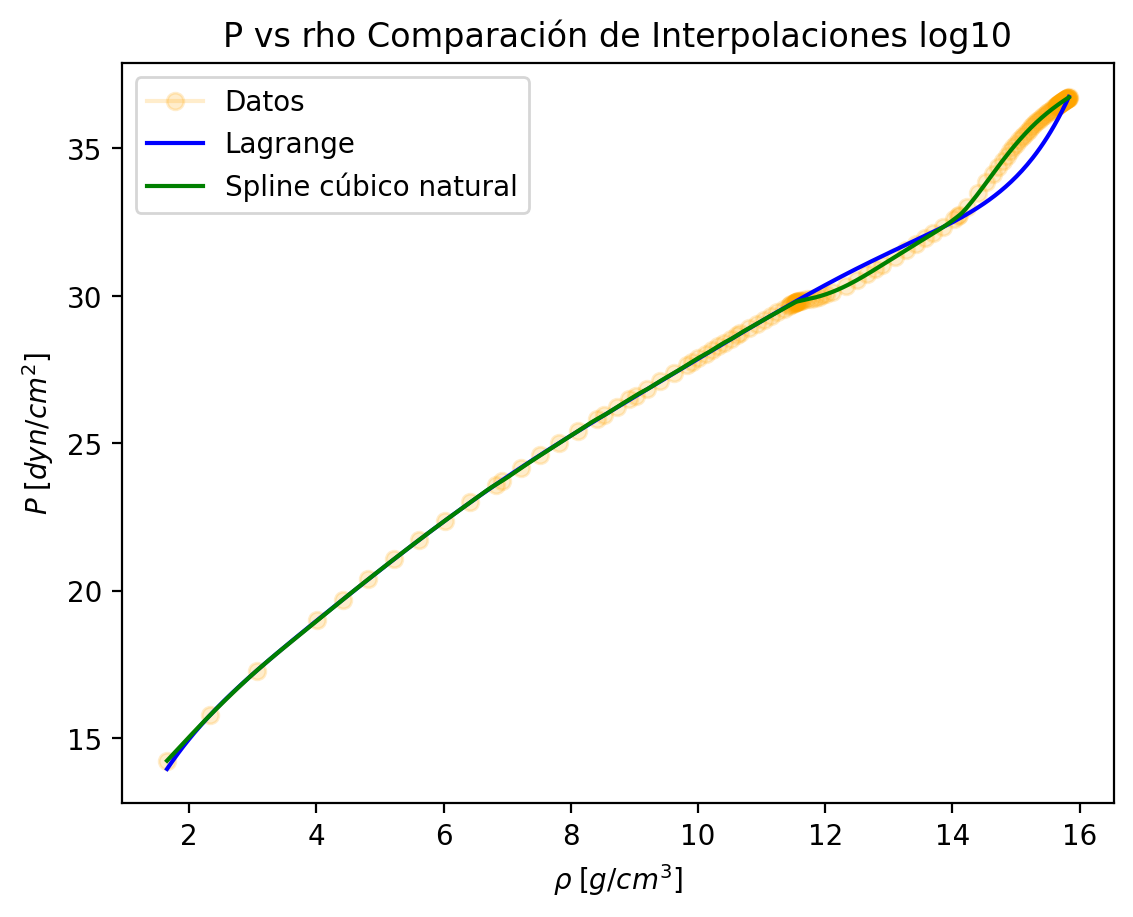

In [115]:
lagrange_interp = lagrange(x_l, y_l)
spline_interp = CubicSpline(x_sc, y_sc, bc_type="natural")
x_new = np.linspace(min(x_sc), max(x_sc), 500)
plt.figure()
plt.plot(x_sc, y_sc, marker='o', color='orange', alpha=0.2, label="Datos")
plt.plot(x_new, lagrange_interp(x_new), label="Lagrange", color='blue')
plt.plot(x_new, spline_interp(x_new), label="Spline cúbico natural", color='green')
plt.xlabel(r"$\rho\;[g/cm^3]$")
plt.ylabel(r"$P\;[dyn/cm^2]$")
plt.title("P vs rho Comparación de Interpolaciones log10")
plt.legend()
plt.show()

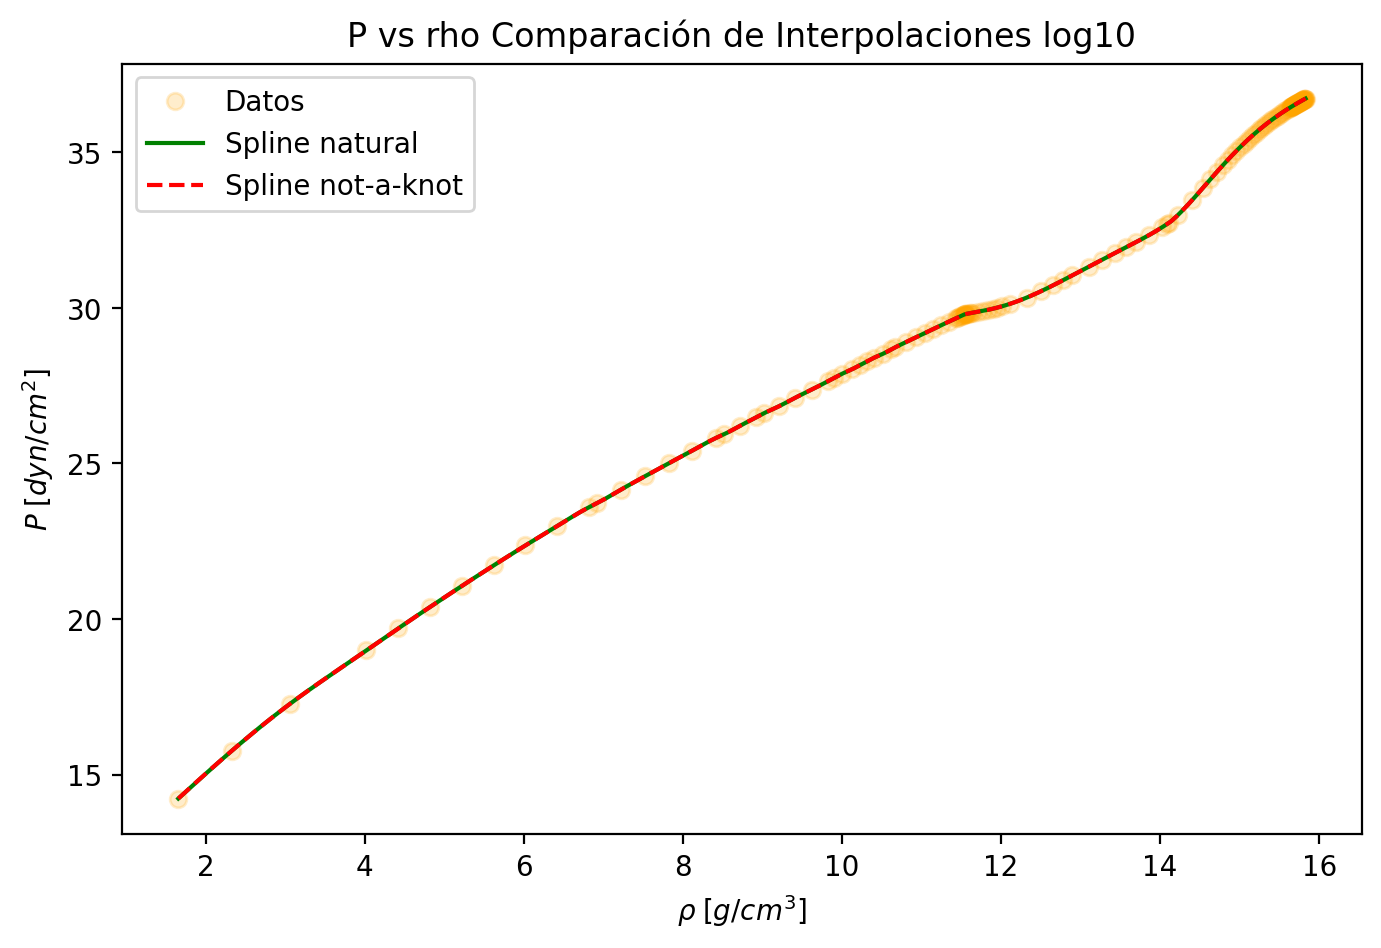

In [116]:
x_new_l = np.linspace(min(x_l), max(x_l), 500)
x_new = np.linspace(min(x_sc), max(x_sc), 500)


plt.figure(figsize=(8,5))
plt.plot(x_sc, y_sc, 'o',           color='orange', label="Datos", alpha=0.2)
plt.plot(x_new, cs_natural(x_new),  color='green',  label="Spline natural")
plt.plot(x_new, cs_not(x_new),'--', color='red',    label="Spline not-a-knot")

plt.legend()
plt.xlabel(r"$\rho\;[g/cm^3]$")
plt.ylabel(r"$P\;[dyn/cm^2]$")
plt.title("Comparación de interpolaciones")
plt.title("P vs rho Comparación de Interpolaciones log10")
plt.show()

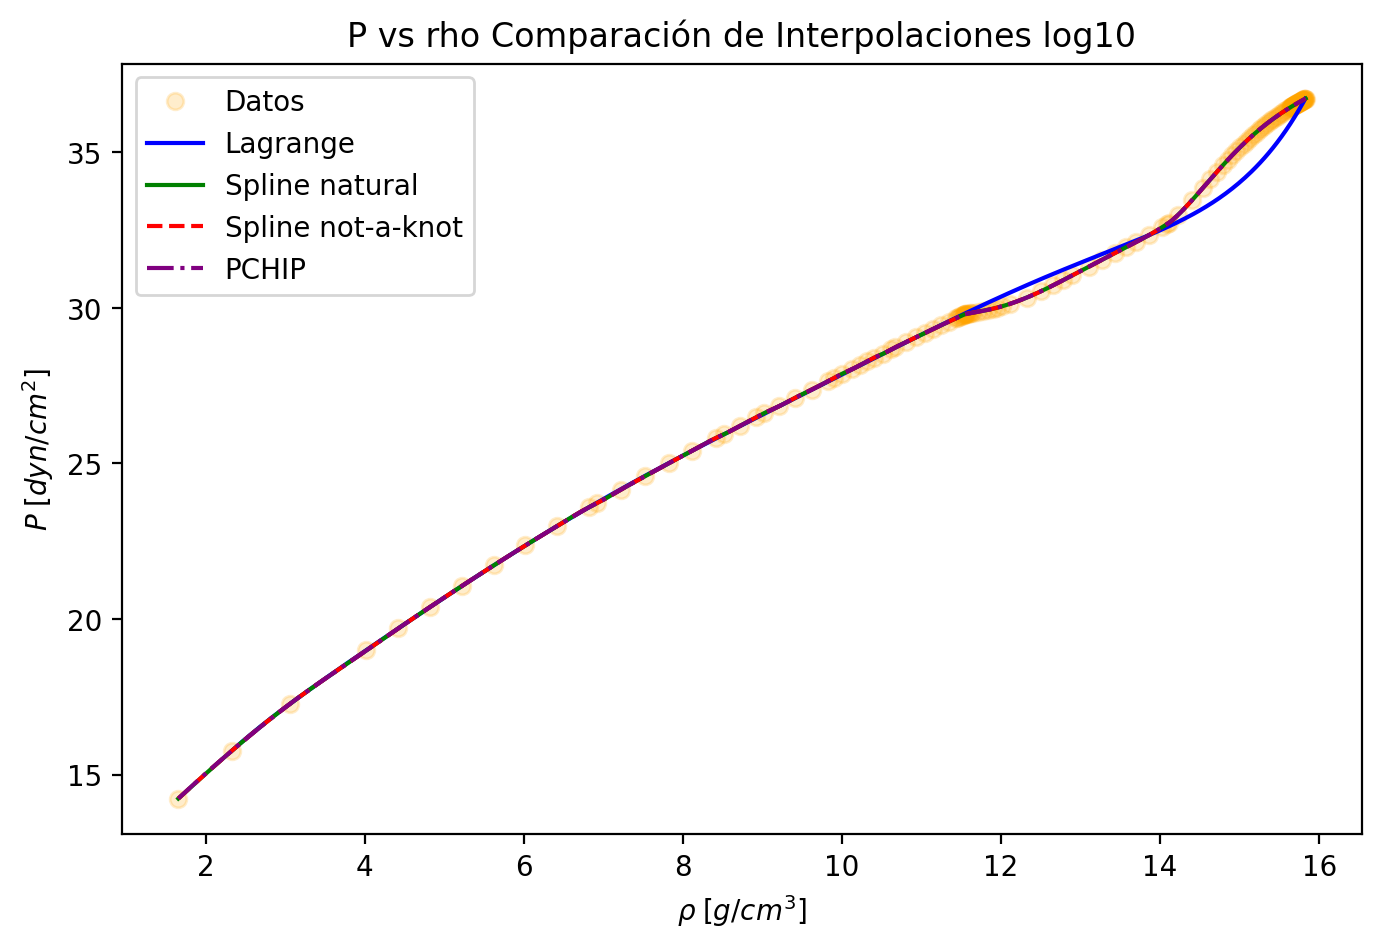

In [117]:
x_new_l = np.linspace(min(x_l), max(x_l), 500)
x_new = np.linspace(min(x_sc), max(x_sc), 500)


plt.figure(figsize=(8,5))
plt.plot(x_sc, y_sc, 'o',           color='orange', label="Datos", alpha=0.2)
plt.plot(x_new_l, poly(x_new_l),    color='blue',   label="Lagrange")
plt.plot(x_new, cs_natural(x_new),  color='green',  label="Spline natural")
plt.plot(x_new, cs_not(x_new),'--', color='red',    label="Spline not-a-knot")
plt.plot(x_new, pchip(x_new), '-.', color='purple', label="PCHIP")

plt.legend()
plt.xlabel(r"$\rho\;[g/cm^3]$")
plt.ylabel(r"$P\;[dyn/cm^2]$")
plt.title("P vs rho Comparación de Interpolaciones log10")
plt.show()

##Ecuación de Estado P(n_B)

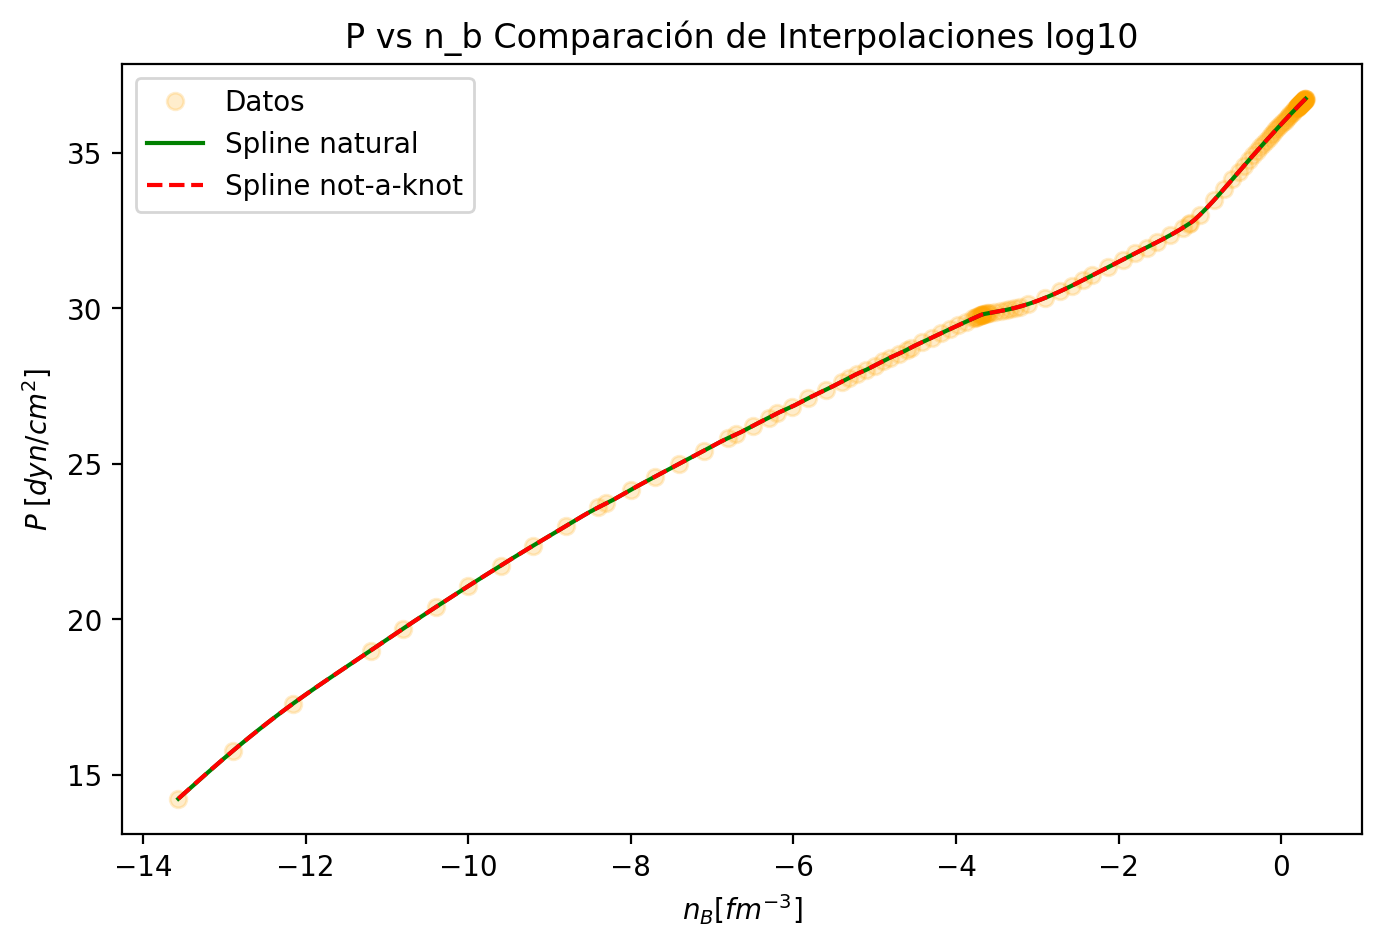

In [118]:
x_new_l2 = np.linspace(min(x_l2), max(x_l2), 500)
x_new2 = np.linspace(min(x_sc2), max(x_sc2), 500)


plt.figure(figsize=(8,5))
plt.plot(x_sc2, y_sc2, 'o',           color='orange', label="Datos", alpha=0.2)
plt.plot(x_new2, cs_natural2(x_new2),  color='green',  label="Spline natural")
plt.plot(x_new2, cs_not2(x_new2),'--', color='red',    label="Spline not-a-knot")

plt.legend()
plt.xlabel(r"$n_B[fm^{-3}]$")
plt.ylabel(r"$P\;[dyn/cm^2]$")
plt.title("P vs n_b Comparación de Interpolaciones log10")
plt.show()

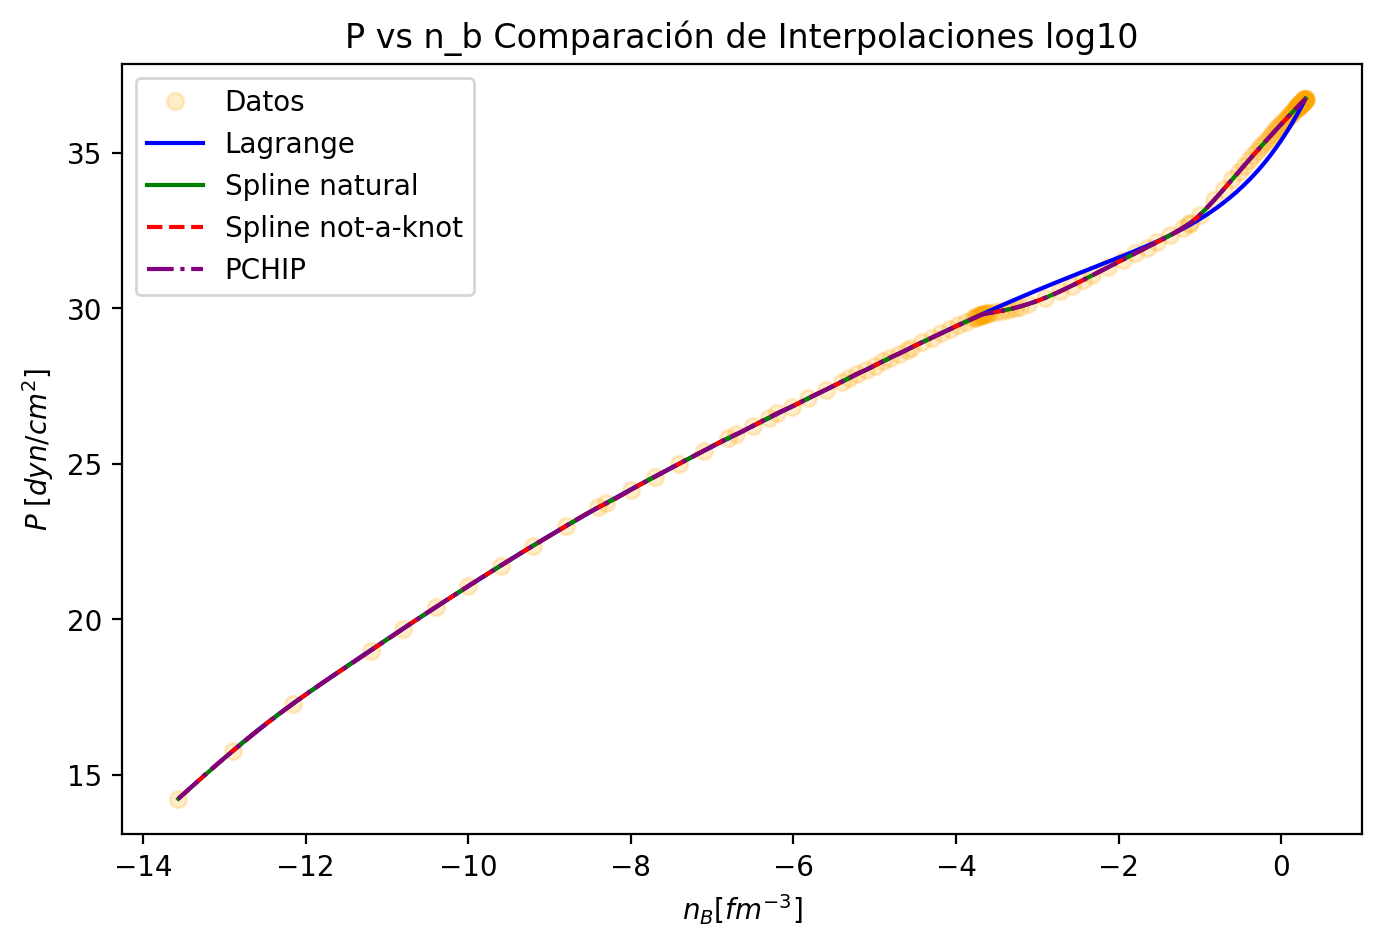

In [119]:
x_new_l2 = np.linspace(min(x_l2), max(x_l2), 500)
x_new2 = np.linspace(min(x_sc2), max(x_sc2), 500)


plt.figure(figsize=(8,5))
plt.plot(x_sc2, y_sc2, 'o',            color='orange', label="Datos", alpha=0.2)
plt.plot(x_new_l2, poly2(x_new_l2),    color='blue',   label="Lagrange")
plt.plot(x_new2, cs_natural2(x_new2),  color='green',  label="Spline natural")
plt.plot(x_new2, cs_not2(x_new2),'--', color='red',    label="Spline not-a-knot")
plt.plot(x_new2, pchip2(x_new2), '-.', color='purple', label="PCHIP")

plt.legend()
plt.xlabel(r"$n_B[fm^{-3}]$")
plt.ylabel(r"$P\;[dyn/cm^2]$")
plt.title("P vs n_b Comparación de Interpolaciones log10")
plt.show()